___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 50)

In [ ]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

In [ ]:
strategy = tf.distribute.TPUStrategy(resolver)

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path= "/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv"
data = pd.read_csv(path)
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
def print_dataset_info(data):
    # Shape of the dataset
    print("Shape of the dataset:", data.shape)
    print()

    # Info of the dataset
    print("Info of the dataset:")
    print(data.info())
    print()

    # Number of unique values in each column
    print("Number of unique values in each column:")
    print(data.nunique())
    print()

    # Missing values in each column
    print("Missing values in each column:")
    print(data.isnull().sum())
    print()

    # All columns of the dataset
    print("Columns of the dataset:")
    print(data.columns)


    # Identify duplicate rows
    print("Duplicate rows")
    print(data.duplicated().sum())

print_dataset_info(data)

Shape of the dataset: (23486, 11)

Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None

Number of unique values in each column:
Unnamed: 0                 23486
Clothing ID      

In [ ]:
data.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [ ]:
data.describe(include=object)

,Title,Review Text,Division Name,Department Name,Class Name
count,19676,22641,23472,23472,23472
unique,13993,22634,3,6,20
top,Love it!,Perfect fit and i've gotten so many compliment...,General,Tops,Dresses
freq,136,3,13850,10468,6319


In [ ]:
data.drop_duplicates()
data.dropna(inplace=True)

In [ ]:
# reseat the index after droping some rows
data.reset_index(drop=True, inplace=True)

In [ ]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [ ]:
data.tail()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
19657,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
19658,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
19659,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
19660,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
19661,23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


In [ ]:
print("Shape of the dataset:", data.shape)

Shape of the dataset: (19662, 11)


In [ ]:
def count_unique_numerical_values(data):
    numerical_columns = data.select_dtypes(include=[np.number])

    # Calculate the number of unique values in each numerical column
    unique_counts = numerical_columns.nunique()

    for feature, count in unique_counts.items():
        print(f"{feature} feature has {count} unique values.")

count_unique_numerical_values(data)

Unnamed: 0 feature has 19662 unique values.
Clothing ID feature has 1095 unique values.
Age feature has 77 unique values.
Rating feature has 5 unique values.
Recommended IND feature has 2 unique values.
Positive Feedback Count feature has 79 unique values.


In [ ]:
def count_unique_object_values(data):
    object_columns = data.select_dtypes(include=[object])

    # Calculate the number of unique values in object column
    unique_counts = object_columns.nunique()

    for feature, count in unique_counts.items():
        print(f"{feature} feature has {count} unique values.")

count_unique_object_values(data)

Title feature has 13983 unique values.
Review Text feature has 19656 unique values.
Division Name feature has 3 unique values.
Department Name feature has 6 unique values.
Class Name feature has 20 unique values.


In [ ]:
target_counts = data["Recommended IND"].value_counts()

# Calculate the percentage of each class
class_percentages = target_counts / target_counts.sum() * 100

print("Class Distribution:")
print(target_counts)
print()

print("Class Percentages:")
print(class_percentages)

Class Distribution:
1    16087
0     3575
Name: Recommended IND, dtype: int64

Class Percentages:
1    81.817719
0    18.182281
Name: Recommended IND, dtype: float64


In [ ]:
data["Recommended IND"].describe()

count    19662.000000
mean         0.818177
std          0.385708
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Recommended IND, dtype: float64

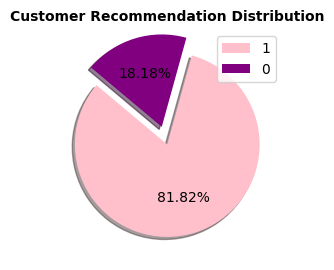

In [ ]:
plt.figure(figsize=(6, 3))

explode = [0, 0.2]
colors = ['pink', 'purple']
plt.pie(data['Recommended IND'].value_counts(), explode=explode, autopct='%1.2f%%', shadow=True, startangle=140, colors=colors)
plt.legend(labels=['1', '0'])
plt.title('Customer Recommendation Distribution', fontsize=10, fontweight='bold')
plt.axis('off');

A majority of the reviews,based on the sentiment analysis in the "Recommended IND" column, indicate a **positive sentiment** towards the product.



A smaller proportion of the reviews express **a negative sentiment** or do not recommend the product.

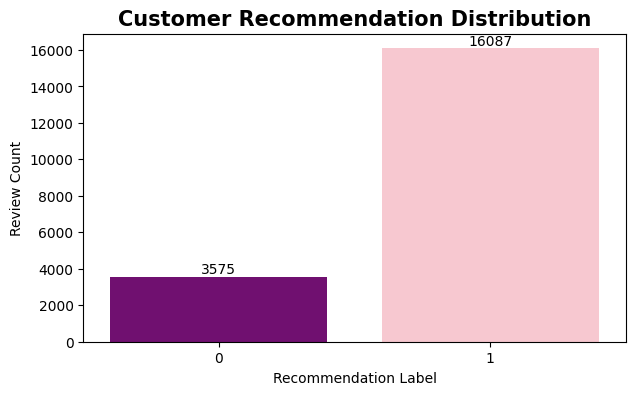

In [ ]:
colors = ['purple', 'pink']

sns.countplot(x=data['Recommended IND'], data=data, palette=colors)
plt.title('Customer Recommendation Distribution', fontsize=15, fontweight='bold')
plt.xlabel("Recommendation Label", fontsize=10)
plt.ylabel("Review Count", fontsize=10)

for index, value in enumerate(data['Recommended IND'].value_counts().sort_values()):
    plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize=10)

plt.show()

In [ ]:
data["Rating"].value_counts()

5    10858
4     4289
3     2464
2     1360
1      691
Name: Rating, dtype: int64

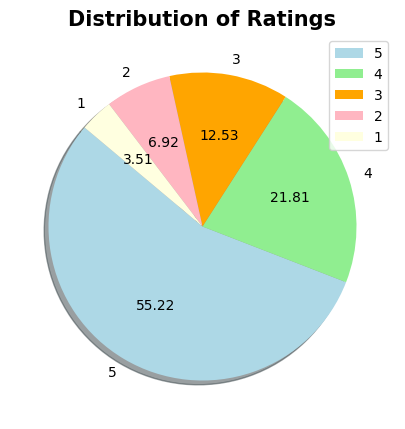

In [ ]:
plt.figure(figsize=(8,5))
ax =data.Rating.value_counts()
labels=data['Rating'].value_counts().index
colors = ['lightblue', 'lightgreen', 'orange', 'lightpink', 'lightyellow']
plt.pie(ax,labels=labels,autopct='%1.2f', shadow=True, startangle=140, colors=colors)

plt.title("Distribution of Ratings",fontsize=15,color='black', fontweight='bold')
plt.legend()
plt.show()

Over half of the reviews were given **a 5-star** rating

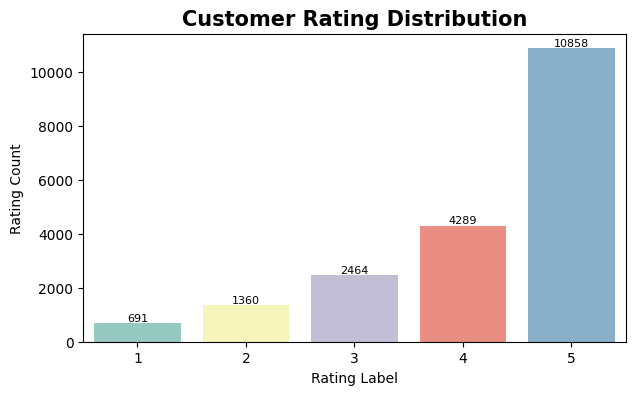

In [ ]:
sns.countplot(x = data.Rating, data = data, palette='Set3')
plt.title('Customer Rating Distribution', fontsize=15, fontweight='bold')
plt.xlabel("Rating Label", fontsize=10)
plt.ylabel("Rating Count", fontsize=10)

for index,value in enumerate(data.Rating.value_counts().sort_values()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 8);

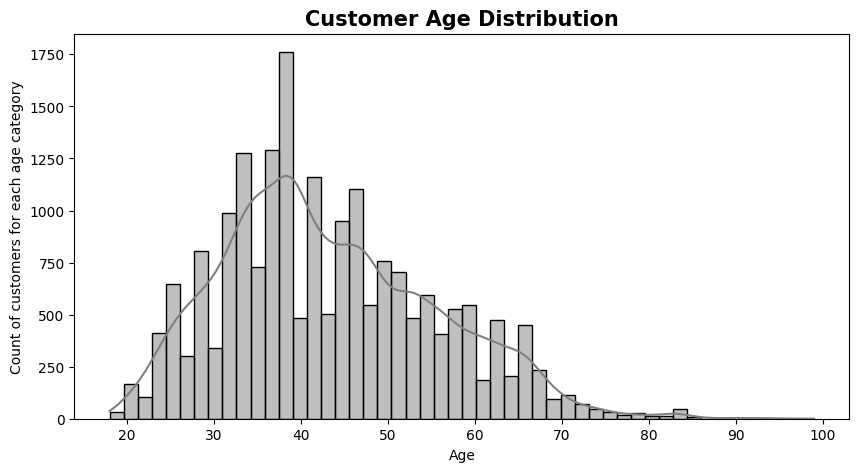

In [ ]:
#histogram and KDE plot
plt.figure(figsize = (10, 5))
plt.title('Customer Age Distribution', fontsize=15,fontweight='bold')
plt.xlabel("Age", fontsize=10)
plt.ylabel("Count of customers for each age category", fontsize=10)

sns.histplot(data, x='Age', kde = True, bins = 50, color='gray');

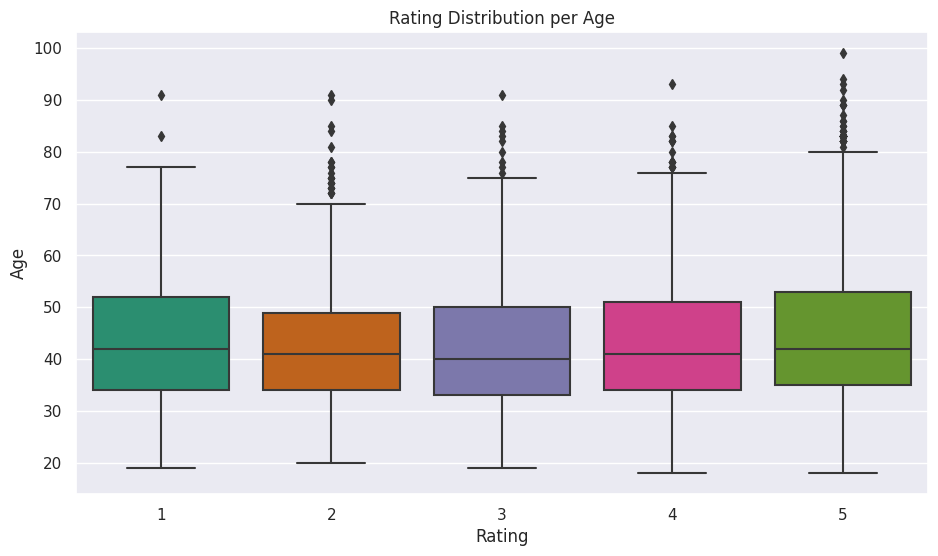

In [ ]:
#visualize the relationship between the age and rating
sns.set(rc={'figure.figsize':(11,6)})
sns.set_palette("Dark2")
sns.boxplot(x = 'Rating', y = 'Age', data = data)
plt.title('Rating Distribution per Age');

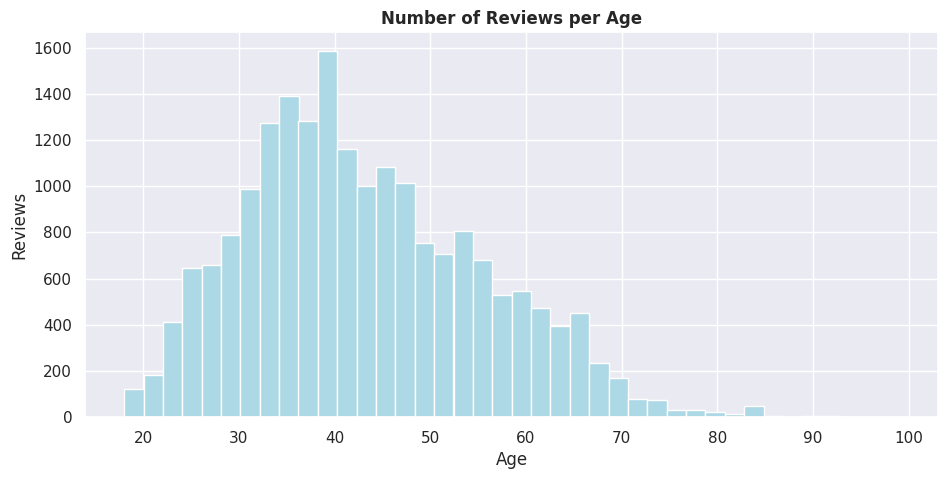

In [ ]:
sns.set(rc={'figure.figsize':(11,5)})
plt.hist(data.Age, bins=40, color='lightblue')
plt.xlabel('Age')
plt.ylabel('Reviews')
plt.title('Number of Reviews per Age', fontweight='bold');

- Most reviews were written by customers in their 40’s
- Reviews decreased as age of the reviewer decreased after 40

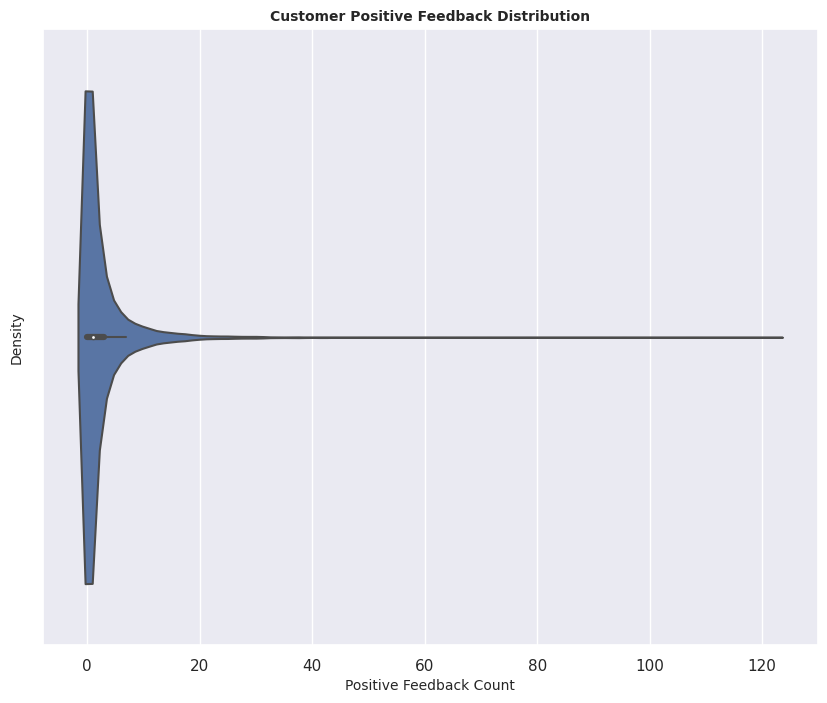

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Customer Positive Feedback Distribution', fontsize=10, fontweight='bold')
plt.xlabel("Customer Positive Feedback", fontsize=10)
plt.ylabel("Density", fontsize=10)

sns.violinplot(data=data, x='Positive Feedback Count')

plt.show()

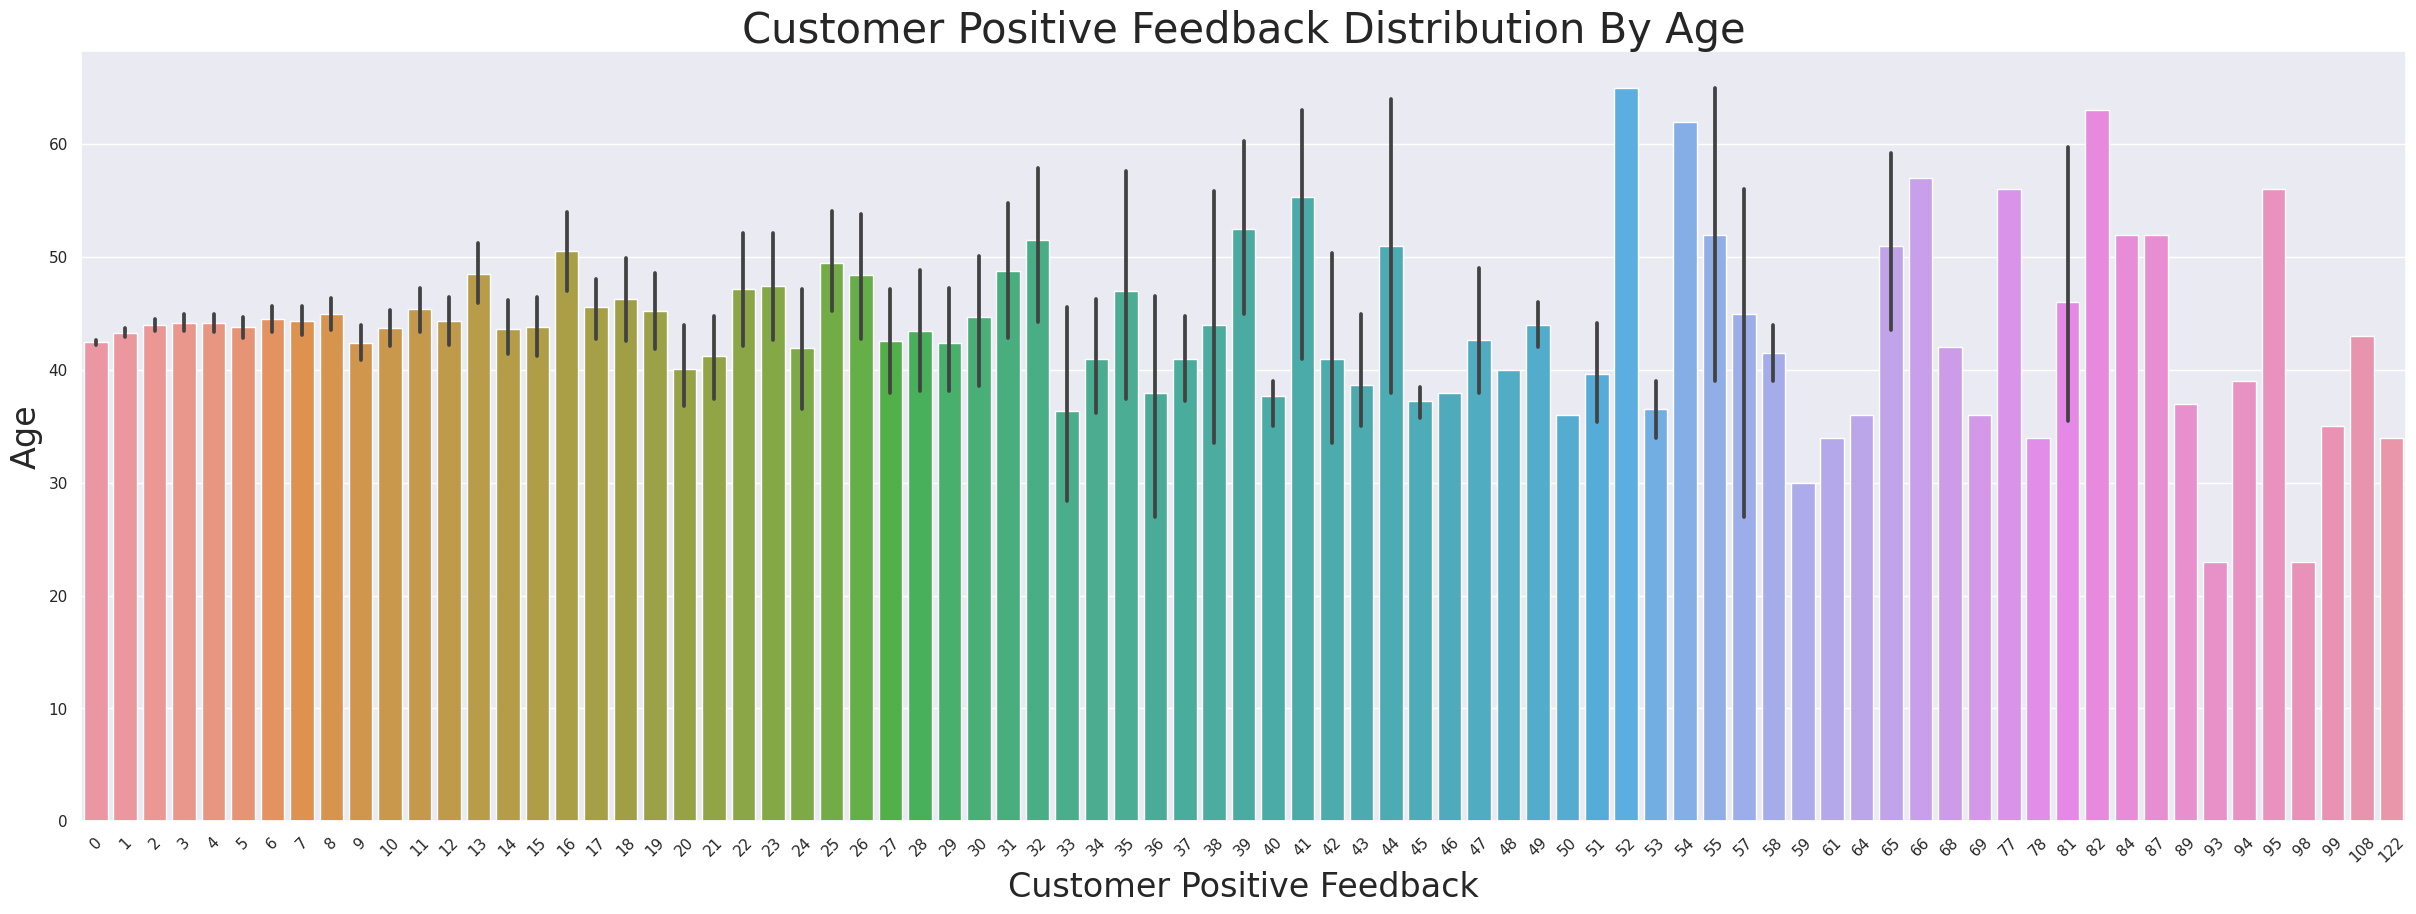

In [ ]:
fig_dims = (30, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data = data, x = "Positive Feedback Count", y = "Age", ax=ax)

plt.xlabel("Customer Positive Feedback", fontsize=24)
plt.ylabel("Age", fontsize=24)

plt.title('Customer Positive Feedback Distribution By Age', fontsize=30)
plt.xticks(rotation = 45);

In [ ]:
data["Division Name"].value_counts()

General           11664
General Petite     6778
Initmates          1220
Name: Division Name, dtype: int64

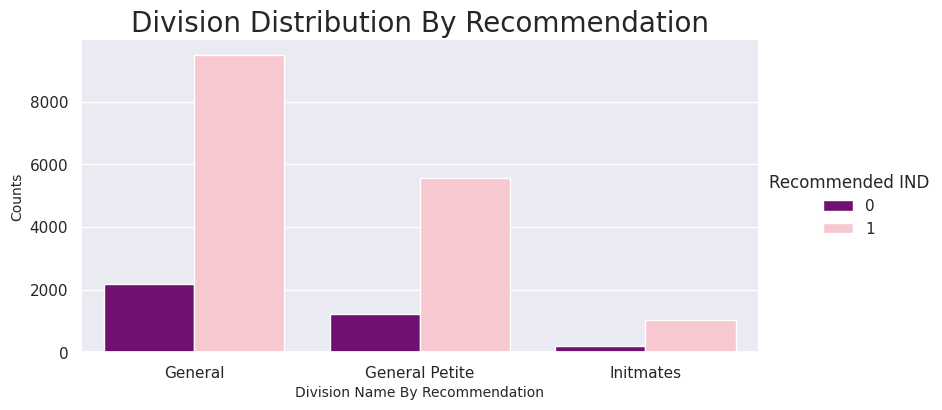

In [ ]:
colors = ['purple', 'pink']
sns.catplot(data = data, x ="Division Name", hue = "Recommended IND", kind='count', height=4, aspect=2, legend_out=True, palette= colors)

plt.title('Division Distribution By Recommendation', fontsize=20)
plt.xlabel("Division Name By Recommendation", fontsize=10)
plt.ylabel("Counts", fontsize=10)


plt.show()

In [ ]:
data["Department Name"].value_counts()

Tops        8713
Dresses     5371
Bottoms     3184
Intimate    1408
Jackets      879
Trend        107
Name: Department Name, dtype: int64

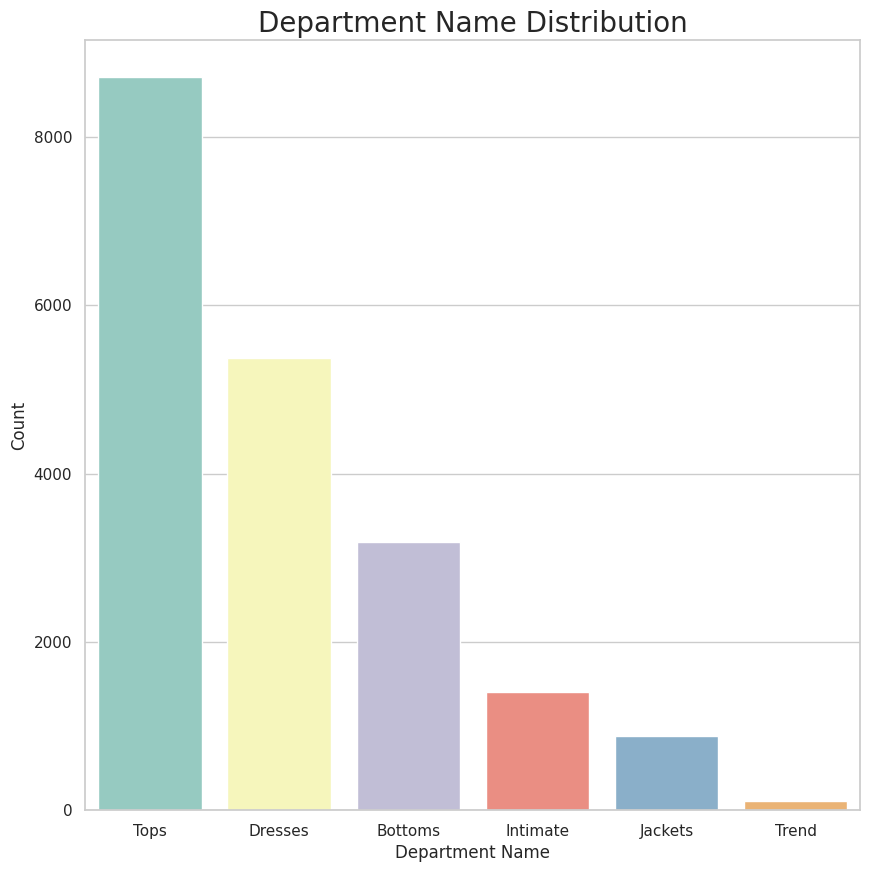

In [ ]:
z = data.groupby(by=['Department Name'],as_index=False).count().sort_values(by='Class Name',ascending=False)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=z['Department Name'],y=z['Class Name'], data=z, palette='Set3')
plt.title("Department Name Distribution", fontsize=20)
plt.xlabel("Department Name")
plt.ylabel("Count")

plt.show()

The **tops department** received the most reviews

### Data Wrangling

In [ ]:
data.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [ ]:
#drop unnecassary columns for NLP task
data.drop(['Unnamed: 0','Clothing ID', 'Age', 'Title', 'Rating',
       'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'], axis=1, inplace=True)

In [ ]:
data.isnull().sum()

Review Text        0
Recommended IND    0
dtype: int64

In [ ]:
data.head()

,Review Text,Recommended IND
0,I had such high hopes for this dress and reall...,0
1,"I love, love, love this jumpsuit. it's fun, fl...",1
2,This shirt is very flattering to all due to th...,1
3,"I love tracy reese dresses, but this one is no...",0
4,I aded this in my basket at hte last mintue to...,1


#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

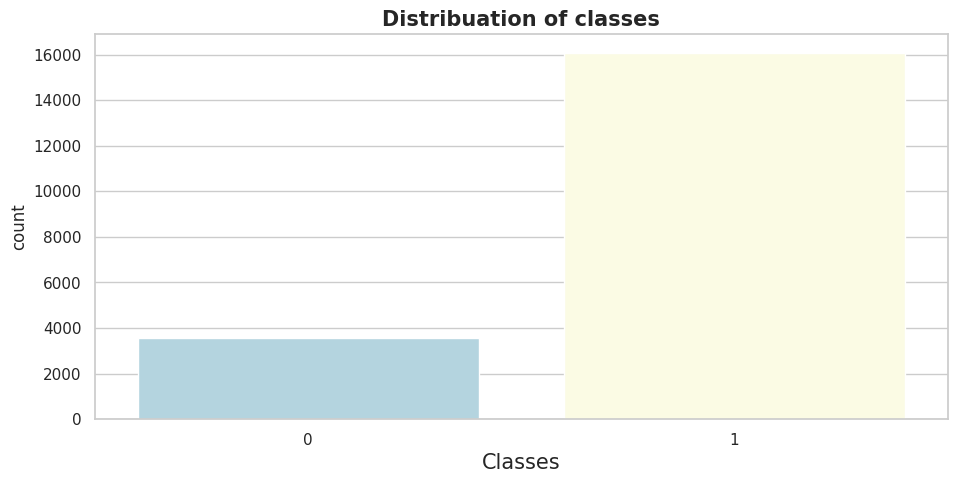

In [ ]:
sns.countplot(x='Recommended IND',data=data,palette=['lightblue', 'lightyellow'])
plt.xlabel('Classes',fontsize=15)
plt.title('Distribuation of classes',fontsize=15, fontweight='bold');

In [ ]:
data['length'] = data['Review Text'].apply(len)
data.head()

,Review Text,Recommended IND,length
0,I had such high hopes for this dress and reall...,0,500
1,"I love, love, love this jumpsuit. it's fun, fl...",1,124
2,This shirt is very flattering to all due to th...,1,192
3,"I love tracy reese dresses, but this one is no...",0,488
4,I aded this in my basket at hte last mintue to...,1,496


In [ ]:
data.tail()

,Review Text,Recommended IND,length
19657,I was very happy to snag this dress at such a ...,1,131
19658,"It reminds me of maternity clothes. soft, stre...",1,223
19659,"This fit well, but the top was very see throug...",0,208
19660,I bought this dress for a wedding i have this ...,1,427
19661,This dress in a lovely platinum is feminine an...,1,110


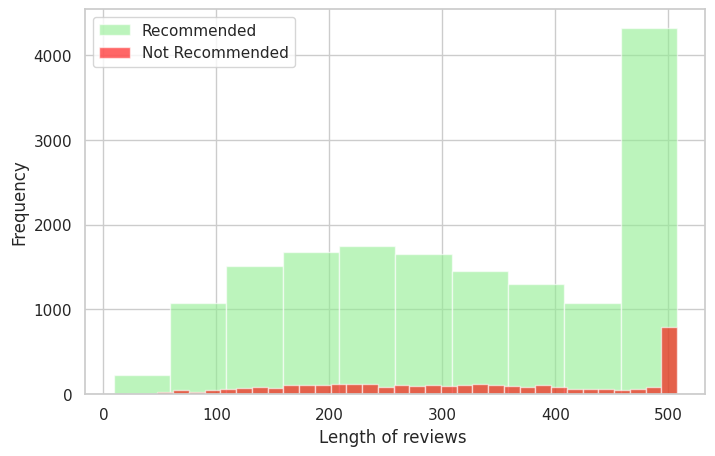

In [ ]:
plt.figure(figsize=(8, 5))
data[data['Recommended IND'] == 1].length.plot(kind='hist', color='lightgreen', label='Recommended', alpha=0.6)
data[data['Recommended IND'] == 0].length.plot(bins=35, kind='hist', color='red', label='Not Recommended', alpha=0.6)
plt.legend()
plt.xlabel("Length of reviews ");

In [ ]:
reviews = data[data['length'] > 500]

# Get the count of reviews
len_reviews= len(reviews)

print("Number of reviews with length greater than 500:", len_reviews)

Number of reviews with length greater than 500: 576


The largest reviews has over 500 characters, some of them are very short.

In [ ]:
data.drop('length', axis=1, inplace=True)

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [ ]:
data.head()

,Review Text,Recommended IND
0,I had such high hopes for this dress and reall...,0
1,"I love, love, love this jumpsuit. it's fun, fl...",1
2,This shirt is very flattering to all due to th...,1
3,"I love tracy reese dresses, but this one is no...",0
4,I aded this in my basket at hte last mintue to...,1


### Missing Value Detection

In [ ]:
data['Review Text'].isnull().value_counts()

False    19662
Name: Review Text, dtype: int64

In [ ]:
data['Recommended IND'].isnull().value_counts()

False    19662
Name: Recommended IND, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19662 entries, 0 to 19661
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review Text      19662 non-null  object
 1   Recommended IND  19662 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 307.3+ KB


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [ ]:
def cleaning_fsa(data):

    import re
    #1. Remove Puncs
    # \w typically matches [A-Za-z0-9_]
    text = re.sub('[^\w\s]','', data)

    #2. Tokenize
    text_tokens = word_tokenize(text.lower())

    #3. Remove numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #joining
    return " ".join(text_cleaned)

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
text = cleaning_fsa(str(data["Review Text"]))
text

'high hope dress reall love love love jumpsuit fun fl shirt flattering due th love tracy reese dress one aded basket hte last mintue happy snag dress reminds maternity clothes soft stre fit well top see throug bought dress wedding dress lovely platinum feminine name review text length dtype object'

In [ ]:
data["Review Text"] = data["Review Text"].apply(cleaning_fsa)
data["Review Text"].head()

0    high hope dress really wanted work initially o...
1    love love love jumpsuit fun flirty fabulous ev...
2    shirt flattering due adjustable front tie perf...
3    love tracy reese dress one petite foot tall us...
4    aded basket hte last mintue see would look lik...
Name: Review Text, dtype: object

In [ ]:
data.head()

,Review Text,Recommended IND
0,high hope dress really wanted work initially o...,0
1,love love love jumpsuit fun flirty fabulous ev...,1
2,shirt flattering due adjustable front tie perf...,1
3,love tracy reese dress one petite foot tall us...,0
4,aded basket hte last mintue see would look lik...,1


In [ ]:
data.tail()

,Review Text,Recommended IND
19657,happy snag dress great price easy slip flatter...,1
19658,reminds maternity clothes soft stretchy shiny ...,1
19659,fit well top see never would worked im glad ab...,0
19660,bought dress wedding summer cute unfortunately...,1
19661,dress lovely platinum feminine fit perfectly e...,1


In [ ]:
#Handling With Rare Words

" ".join(data["Review Text"]).split()

['high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'legging',
 'sleeveless',
 'pair',
 'well',
 'cardigan',
 'love',
 'shirt',
 'love',
 'tracy',
 'reese',
 'dress',
 'one',
 'petite',
 'foot',
 'tall',
 'usually',
 'wear',
 'brand',
 'dress',
 'pretty',
 'package',
 'lot',
 'dress',
 'skirt',
 'long',
 'full',


In [ ]:
word_values = pd.Series(" ".join(data["Review Text"]).split()).value_counts()
word_values

dress            10048
fit               9068
size              8392
love              7746
top               7342
                 ...  
qualitynot           1
vulnerability        1
purplegray           1
largeblack           1
platinum             1
Length: 15883, dtype: int64

In [ ]:
rare_words = word_values[word_values <= 2]
rare_words

reattaching      2
buttonsi         2
predict          2
toosmall         2
jacketthe        2
                ..
qualitynot       1
vulnerability    1
purplegray       1
largeblack       1
platinum         1
Length: 10320, dtype: int64

In [ ]:
rare_words.value_counts()

1    8528
2    1792
dtype: int64

In [ ]:
len(rare_words)

10320

In [ ]:
rare_words.index

Index(['reattaching', 'buttonsi', 'predict', 'toosmall', 'jacketthe',
       'slanted', 'mediterranean', 'reviewersi', 'divinely', 'moon',
       ...
       'longerbroader', 'doest', 'hungyuck', 'largenot', 'bedskirt',
       'qualitynot', 'vulnerability', 'purplegray', 'largeblack', 'platinum'],
      dtype='object', length=10320)

In [ ]:
#filtering out these rare words
data["Review Text"] = data["Review Text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
data["Review Text"].head()

0    high hope dress really wanted work initially o...
1    love love love jumpsuit fun flirty fabulous ev...
2    shirt flattering due adjustable front tie perf...
3    love tracy reese dress one petite foot tall us...
4    basket hte last see would look like person sto...
Name: Review Text, dtype: object

In [ ]:
data.head()

,Review Text,Recommended IND
0,high hope dress really wanted work initially o...,0
1,love love love jumpsuit fun flirty fabulous ev...,1
2,shirt flattering due adjustable front tie perf...,1
3,love tracy reese dress one petite foot tall us...,0
4,basket hte last see would look like person sto...,1


Removing **rare words** reduces noise, improves generalization, and enhances computational efficiency.

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [ ]:
data[data["Recommended IND"] == 0]

,Review Text,Recommended IND
0,high hope dress really wanted work initially o...,0
3,love tracy reese dress one petite foot tall us...,0
8,dress run small esp zipper area run ordered sp...,0
19,first pullover styling side zipper wouldnt pur...,0
22,loved material didnt really look long dress pu...,0
...,...,...
19628,really wanted like dress encouraged positive r...,0
19630,tried color really pretty fun want pair pant l...,0
19638,purchased good price typically love maeve winw...,0
19655,surprised positive review product terrible cut...,0


In [ ]:
data[data["Recommended IND"] == 1]

,Review Text,Recommended IND
1,love love love jumpsuit fun flirty fabulous ev...,1
2,shirt flattering due adjustable front tie perf...,1
4,basket hte last see would look like person sto...,1
5,ordered carbon store pick ton stuff always try...,1
6,love dress usually get x run little snug bust ...,1
...,...,...
19656,wasnt sure ordering skirt couldnt see person f...,1
19657,happy snag dress great price easy slip flatter...,1
19658,reminds maternity clothes soft stretchy shiny ...,1
19660,bought dress wedding summer cute unfortunately...,1


In [ ]:
data["Recommended IND"].value_counts()

1    16087
0     3575
Name: Recommended IND, dtype: int64

### Collect Words (positive and negative separately)

In [ ]:
" ".join(data["Review Text"]).split()

['high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'legging',
 'sleeveless',
 'pair',
 'well',
 'cardigan',
 'love',
 'shirt',
 'love',
 'tracy',
 'reese',
 'dress',
 'one',
 'petite',
 'foot',
 'tall',
 'usually',
 'wear',
 'brand',
 'dress',
 'pretty',
 'package',
 'lot',
 'dress',
 'skirt',
 'long',
 'full',
 'overwhelmed',
 

In [ ]:
neg_words = " ".join(data[data["Recommended IND"] == 0]["Review Text"]).split()
neg_words

['high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'tracy',
 'reese',
 'dress',
 'one',
 'petite',
 'foot',
 'tall',
 'usually',
 'wear',
 'brand',
 'dress',
 'pretty',
 'package',
 'lot',
 'dress',
 'skirt',
 'long',
 'full',
 'overwhelmed',
 'small',
 'frame',
 'stranger',
 'alteration',
 'shortening',
 'skirt',
 'would',
 'take',
 'away',
 'embellishment',
 'garment',
 'love',
 'color',
 'idea',
 'style',
 'work',
 'returned',
 'dress',
 'dress',
 'run',
 'small',
 'esp',
 'zipper',
 'area',
 'run',
 'ordered',
 'sp',
 'typically',
 'fit',
 'tight',
 'mat

In [ ]:
pos_words = " ".join(data[data["Recommended IND"] == 1]["Review Text"]).split()
pos_words

['love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'legging',
 'sleeveless',
 'pair',
 'well',
 'cardigan',
 'love',
 'shirt',
 'basket',
 'hte',
 'last',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'color',
 'pale',
 'hte',
 'color',
 'really',
 'gorgeous',
 'turn',
 'trying',
 'little',
 'baggy',
 'hte',
 'x',
 'hte',
 'size',
 'bummer',
 'petite',
 'decided',
 'though',
 'said',
 'everything',
 'pant',
 'skirt',
 'trying',
 'kept',
 'oops',
 'ordered',
 'carbon',
 'store',
 'pick',
 'ton',
 'stuff',
 'always',
 'try',
 'used',
 'top',
 'pair',
 'skirt',
 'pant',
 'everything',
 'went',
 'color',
 'really',
 'nice',
 'charcoal',
 'shimmer',
 'went',
 'well',
 'pencil',
 'skirt',
 'flare',
 'pant',
 'etc',
 'bit',
 'big',
 'sleeve',
 'long',
 'doesnt',
 'g

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [ ]:
Review_Text = data["Review Text"]

In [ ]:
all_words = " ".join(Review_Text)

In [ ]:
all_words[:100]

'high hope dress really wanted work initially ordered petite small usual size found small small fact '

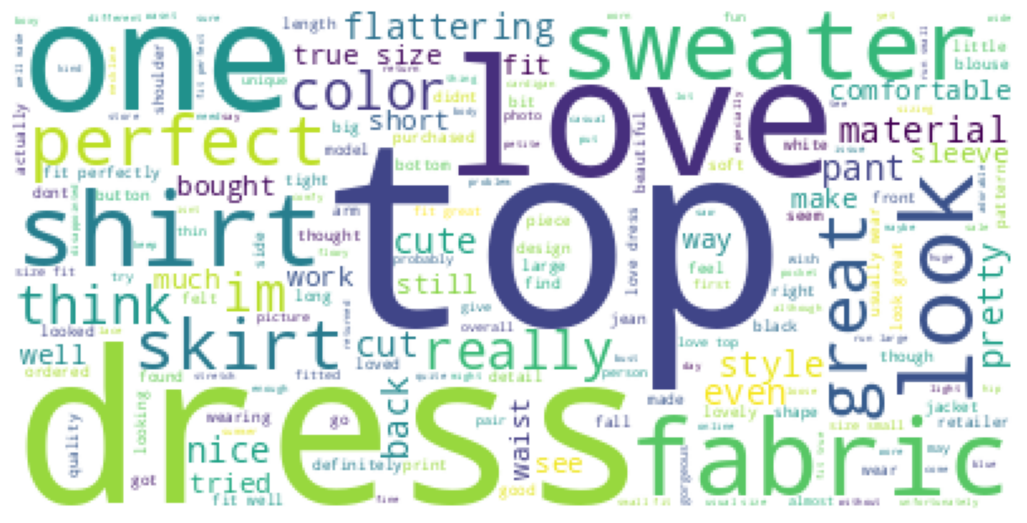

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white", max_words =250).generate(all_words)

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

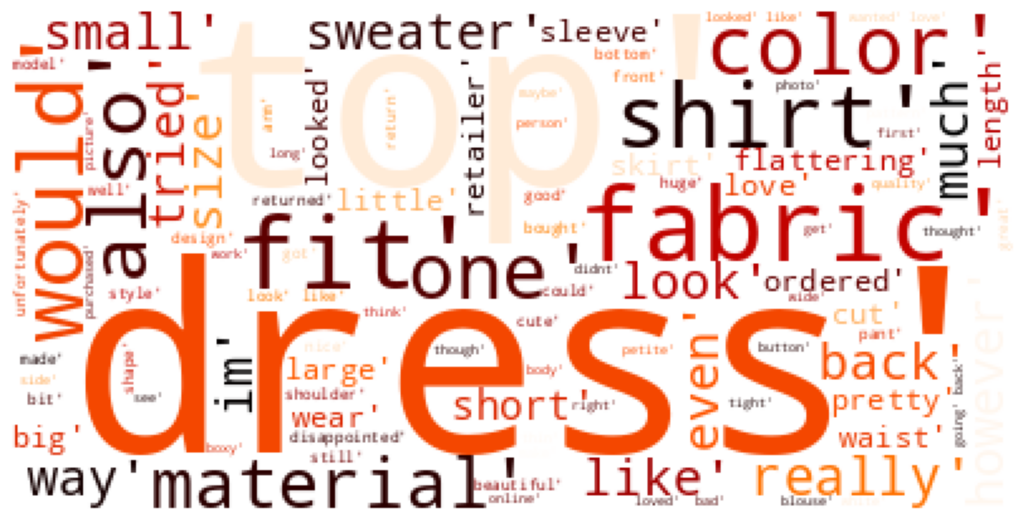

In [ ]:
wordcloud = WordCloud(background_color="white", max_words =250, colormap='gist_heat').generate(str(neg_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

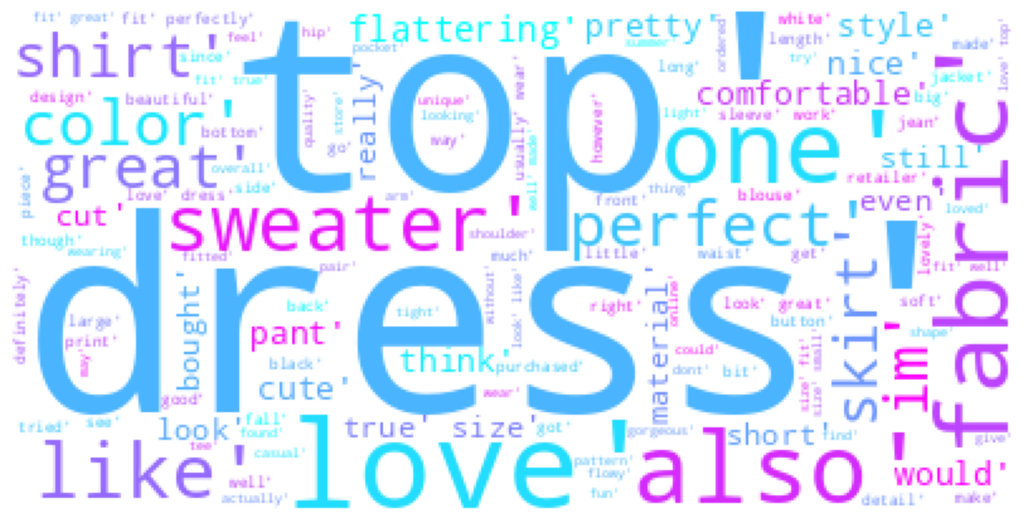

In [ ]:
wordcloud = WordCloud(background_color="white", max_words =250, colormap='cool').generate(str(pos_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [ ]:
data.head(2)

,Review Text,Recommended IND
0,high hope dress really wanted work initially o...,0
1,love love love jumpsuit fun flirty fabulous ev...,1


In [ ]:
X = data["Review Text"]
y= data["Recommended IND"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (15729,)
X_test shape: (3933,)
y_train shape: (15729,)
y_test shape: (3933,)


In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [ ]:
vectorizer = CountVectorizer()

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [ ]:
type(X_train_count)

scipy.sparse._csr.csr_matrix

In [ ]:
type(X_test_count)

scipy.sparse._csr.csr_matrix

In [ ]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
feature_names = vectorizer.get_feature_names_out()


print(feature_names)

['aa' 'ab' 'abdomen' ... 'zipping' 'zone' 'zoom']


In [ ]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,ab,abdomen,ability,able,abo,absolute,absolutely,absolutley,abstract,absurd,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,acceptable,access,accessorize,accessorized,accessorizing,...,yikes,yo,yoga,yoke,york,youd,youll,young,younger,youre,youthful,youve,yr,yuck,yucky,yummy,zero,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15724,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15725,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15726,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15727,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [ ]:
tf_idf_vectorizer = TfidfVectorizer()

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
type(X_train_tf_idf)

scipy.sparse._csr.csr_matrix

In [ ]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,aa,ab,abdomen,ability,able,abo,absolute,absolutely,absolutley,abstract,absurd,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,acceptable,access,accessorize,accessorized,accessorizing,...,yikes,yo,yoga,yoke,york,youd,youll,young,younger,youre,youthful,youve,yr,yuck,yucky,yummy,zero,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.249625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Eval Function

In [ ]:
#evaluates the models
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print("Test_Set")
    print(classification_report(y_test, y_pred))
    print("Train_Set")
    print(classification_report(y_train, y_pred_train))
    fig, ax = plt.subplots(figsize=(8, 8))

    plot_confusion_matrix(model, X_test, y_test, ax=ax)

## Logistic Regression

### CountVectorizer

In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.6, class_weight='balanced', max_iter=1000,
                   random_state=101)

LOG MODEL
Test Set
              precision    recall  f1-score   support

           0       0.62      0.81      0.70       715
           1       0.95      0.89      0.92      3218

    accuracy                           0.88      3933
   macro avg       0.79      0.85      0.81      3933
weighted avg       0.89      0.88      0.88      3933

Train Set
              precision    recall  f1-score   support

           0       0.72      0.96      0.82      2860
           1       0.99      0.92      0.95     12869

    accuracy                           0.93     15729
   macro avg       0.86      0.94      0.89     15729
weighted avg       0.94      0.93      0.93     15729

Confusion Matrix:
[[ 579  136]
 [ 355 2863]]


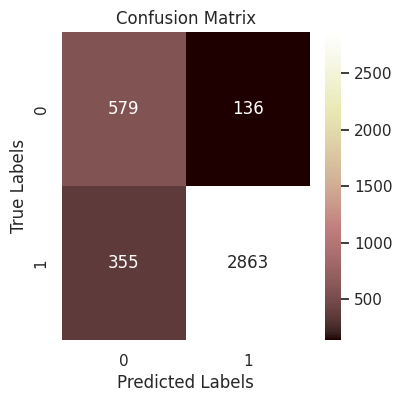

In [ ]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print("Test Set")
    print(classification_report(y_test, y_pred))
    print("Train Set")
    print(classification_report(y_train, y_pred_train))

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="pink")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

print("LOG MODEL")
eval(log, X_train_count, X_test_count)


In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_count_rec = scores
    elif i == "f1-1":
        log_count_f1 = scores
    elif i == "accuracy":
        log_count_acc = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8631833063998228

 precision-0          score for count : 0.5953161322615987

 recall-0             score for count : 0.7737762237762237

 f1-0                 score for count : 0.6727421663005757

 precision-1          score for count : 0.9461773159617959

 recall-1             score for count : 0.883052924265988

 f1-1                 score for count : 0.9135028092119933



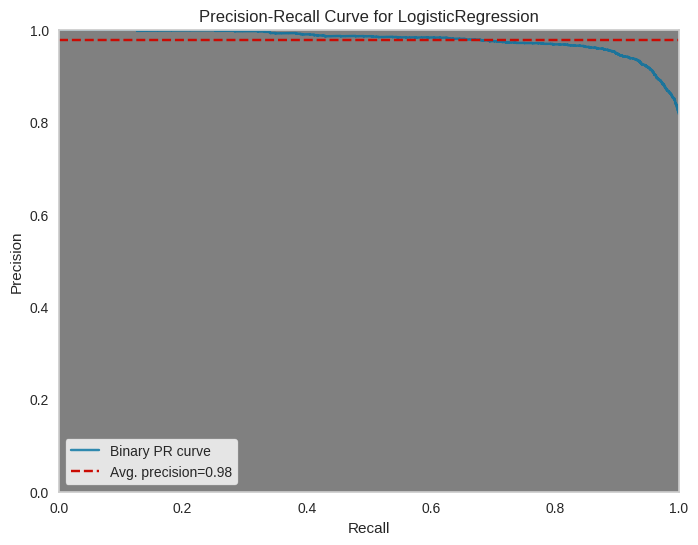

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
                            LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101),
                            classes=log.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor('gray')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
log_AP_count = viz.score_

### TF-IDF

In [ ]:
log = LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")

log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

LOG MODEL
Test Set
              precision    recall  f1-score   support

           0       0.55      0.85      0.67       715
           1       0.96      0.84      0.90      3218

    accuracy                           0.85      3933
   macro avg       0.76      0.85      0.78      3933
weighted avg       0.89      0.85      0.86      3933

Train Set
              precision    recall  f1-score   support

           0       0.57      0.89      0.69      2860
           1       0.97      0.85      0.91     12869

    accuracy                           0.86     15729
   macro avg       0.77      0.87      0.80     15729
weighted avg       0.90      0.86      0.87     15729

Confusion Matrix:
[[ 611  104]
 [ 505 2713]]


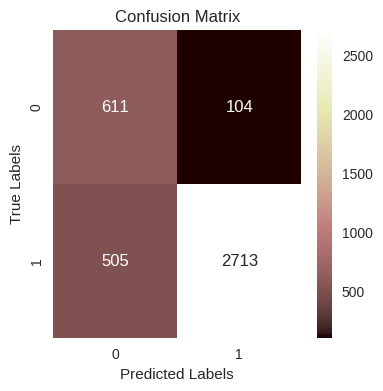

In [ ]:
print("LOG MODEL")

eval(log, X_train_tf_idf, X_test_tf_idf)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_tfidf_rec = scores
    elif i == "f1-1":
        log_tfidf_f1 = scores
    elif i == "accuracy":
        log_tfidf_acc = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.859177654406662

 precision-0          score for tfidf : 0.5773216912116983

 recall-0             score for tfidf : 0.8447552447552449

 f1-0                 score for tfidf : 0.6857767985602554

 precision-1          score for tfidf : 0.9615423708884331

 recall-1             score for tfidf : 0.8623828305787871

 f1-1                 score for tfidf : 0.9092464949346312



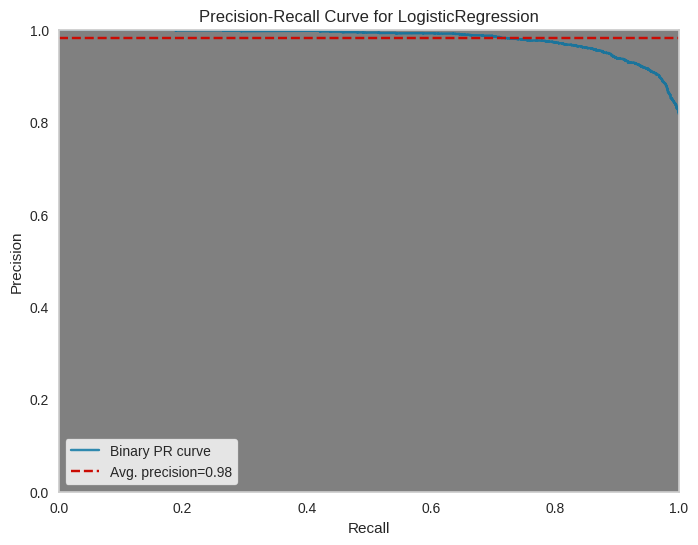

In [ ]:
viz = PrecisionRecallCurve(
                            LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced"),
                            classes=log.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor('gray')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
log_AP_tfidf = viz.score_

The logistic regression model achieved an accuracy of 0.859 and 0.863 for "TF-IDF" and "Count" vectoriser, respectively. While the "TF-IDF" vectoriser had higher precision and recall for class 1, the "Count" vectoriser showed higher precision and recall for class 0.

## Naive Bayes

### Countvectorizer

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary model

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_count, y_train)

MultinomialNB()

NB MODEL
Test Set
              precision    recall  f1-score   support

           0       0.65      0.76      0.70       715
           1       0.94      0.91      0.93      3218

    accuracy                           0.88      3933
   macro avg       0.80      0.83      0.81      3933
weighted avg       0.89      0.88      0.89      3933

Train Set
              precision    recall  f1-score   support

           0       0.70      0.81      0.75      2860
           1       0.96      0.92      0.94     12869

    accuracy                           0.90     15729
   macro avg       0.83      0.87      0.85     15729
weighted avg       0.91      0.90      0.91     15729

Confusion Matrix:
[[ 541  174]
 [ 288 2930]]


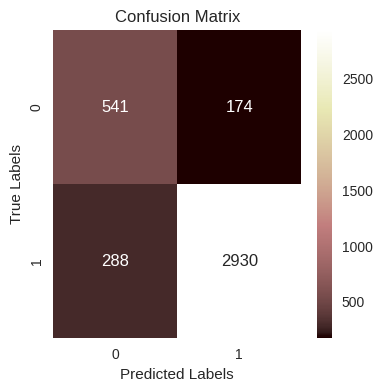

In [ ]:
print("NB MODEL")

eval(nb, X_train_count, X_test_count)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = MultinomialNB()
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nb_count_rec = scores
    elif i == "f1-1":
        nb_count_f1 = scores
    elif i == "accuracy":
        nb_count_acc = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8813658929550672

 precision-0          score for count : 0.6548299645462767

 recall-0             score for count : 0.7353146853146854

 f1-0                 score for count : 0.6925134526755403

 precision-1          score for count : 0.9395682723422001

 recall-1             score for count : 0.9138237259543637

 f1-1                 score for count : 0.9264970474954163



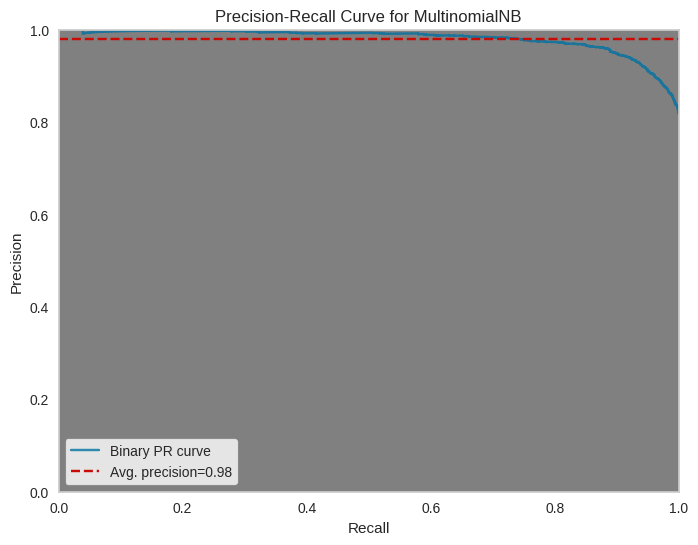

In [ ]:
viz = PrecisionRecallCurve(
                            MultinomialNB(),
                            classes=nb.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor('gray')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
nb_AP_count = viz.score_

### TF-IDF

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB()
nb.fit(X_train_tf_idf, y_train)

MultinomialNB()

NB MODEL
Test Set
              precision    recall  f1-score   support

           0       0.92      0.15      0.26       715
           1       0.84      1.00      0.91      3218

    accuracy                           0.84      3933
   macro avg       0.88      0.57      0.58      3933
weighted avg       0.86      0.84      0.79      3933

Train Set
              precision    recall  f1-score   support

           0       0.94      0.20      0.33      2860
           1       0.85      1.00      0.92     12869

    accuracy                           0.85     15729
   macro avg       0.89      0.60      0.62     15729
weighted avg       0.86      0.85      0.81     15729

Confusion Matrix:
[[ 106  609]
 [   9 3209]]


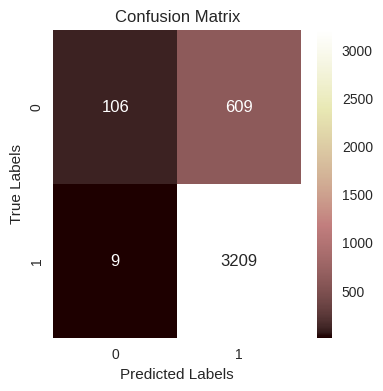

In [ ]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = BernoulliNB()
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nb_tfidf_rec = scores
    elif i == "f1-1":
        nb_tfidf_f1 = scores
    elif i == "accuracy":
        nb_tfidf_acc = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8754528954737143

 precision-0          score for tfidf : 0.6432011532129661

 recall-0             score for tfidf : 0.7073426573426573

 f1-0                 score for tfidf : 0.6735818508767997

 precision-1          score for tfidf : 0.933525038887403

 recall-1             score for tfidf : 0.9128133228444272

 f1-1                 score for tfidf : 0.9230389616191831



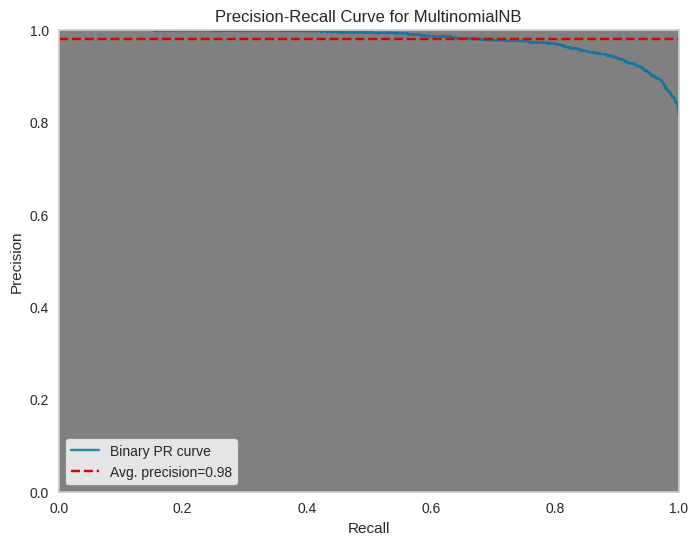

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
                            MultinomialNB(),
                            classes=nb.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor('gray')

viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
nb_AP_tfidf = viz.score_

In Naive Bayes (NB) model when using the "TF-IDF" vectorizer, the model obtained an accuracy of 0.875 and demonstrated higher precision and recall for class 1, indicating its effectiveness in correctly identifying positive instances. In contrast, the "Count" vectorizer resulted in an accuracy of 0.881 and showed higher precision and recall for class 0, highlighting its proficiency in accurately identifying negative instances.

## Support Vector Machine (SVM)

### Countvectorizer

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

SVC MODEL
Test Set
              precision    recall  f1-score   support

           0       0.60      0.84      0.70       715
           1       0.96      0.87      0.92      3218

    accuracy                           0.87      3933
   macro avg       0.78      0.86      0.81      3933
weighted avg       0.90      0.87      0.88      3933

Train Set
              precision    recall  f1-score   support

           0       0.65      0.93      0.76      2860
           1       0.98      0.89      0.93     12869

    accuracy                           0.89     15729
   macro avg       0.81      0.91      0.85     15729
weighted avg       0.92      0.89      0.90     15729

Confusion Matrix:
[[ 603  112]
 [ 407 2811]]


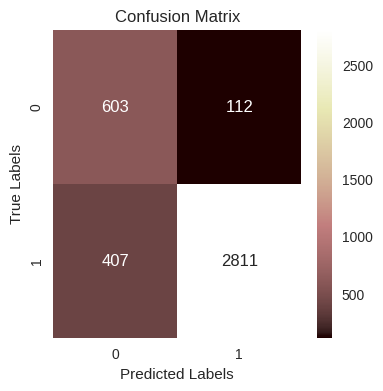

In [ ]:
print("SVC MODEL")

eval(svc, X_train_count, X_test_count)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_count_rec = scores
    elif i == "f1-1":
        svc_count_f1 = scores
    elif i == "accuracy":
        svc_count_acc = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8600043433318936

 precision-0          score for count : 0.58161008482108

 recall-0             score for count : 0.8213286713286714

 f1-0                 score for count : 0.6809061381993119

 precision-1          score for count : 0.9562956155587301

 recall-1             score for count : 0.8685995618343986

 f1-1                 score for count : 0.9103266451788133



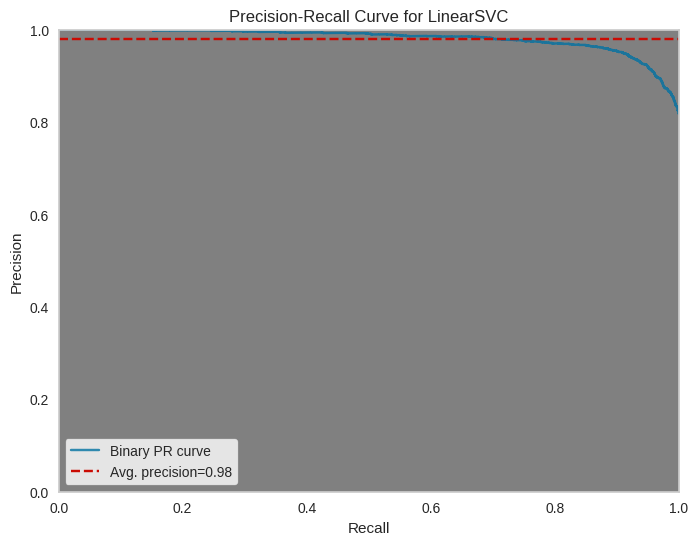

In [ ]:
viz = PrecisionRecallCurve(
                            LinearSVC(C=0.01, class_weight="balanced", random_state=101),
                            classes=svc.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor('gray')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
svc_AP_count = viz.score_

### TD-IDF

In [ ]:
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)

svc.fit(X_train_tf_idf, y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

SVC MODEL
Test Set
              precision    recall  f1-score   support

           0       0.54      0.86      0.67       715
           1       0.96      0.84      0.90      3218

    accuracy                           0.84      3933
   macro avg       0.75      0.85      0.78      3933
weighted avg       0.89      0.84      0.86      3933

Train Set
              precision    recall  f1-score   support

           0       0.56      0.89      0.69      2860
           1       0.97      0.85      0.91     12869

    accuracy                           0.86     15729
   macro avg       0.77      0.87      0.80     15729
weighted avg       0.90      0.86      0.87     15729

Confusion Matrix:
[[ 614  101]
 [ 515 2703]]


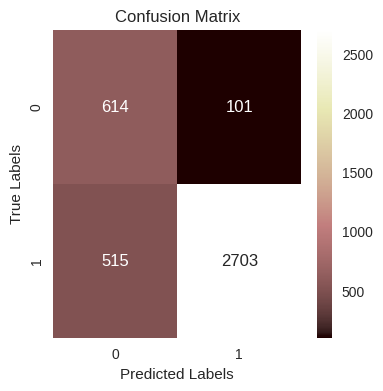

In [ ]:
print("SVC MODEL")

eval(svc, X_train_tf_idf, X_test_tf_idf)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_tfidf_rec = scores
    elif i == "f1-1":
        svc_tfidf_f1 = scores
    elif i == "accuracy":
        svc_tfidf_acc = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8429659456897486

 precision-0          score for tfidf : 0.5436289227346017

 recall-0             score for tfidf : 0.8555944055944057

 f1-0                 score for tfidf : 0.6647235437641287

 precision-1          score for tfidf : 0.9632108174734471

 recall-1             score for tfidf : 0.8401590374374202

 f1-1                 score for tfidf : 0.8974624769692963



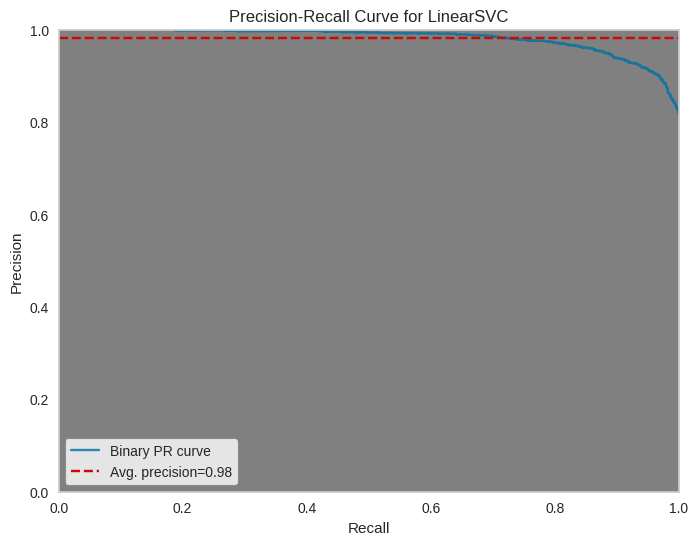

In [ ]:
viz = PrecisionRecallCurve(
                            LinearSVC(C=0.01, class_weight="balanced", random_state=101),
                            classes=svc.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor('gray')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
svc_AP_tfidf = viz.score_

The LinearSVC model with the "count" vectorizer performed slightly better than the model with the "TF-IDF" vectorizer. It achieved a higher accuracy of 0.860 compared to 0.843. The "count" vectorizer also resulted in higher precision and recall for both classes, with F1-scores slightly higher overall.

## Random Forest

### Countvectorizer

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=200,
                       n_jobs=-1, random_state=42)

RF MODEL
Test Set
              precision    recall  f1-score   support

           0       0.56      0.80      0.66       715
           1       0.95      0.86      0.90      3218

    accuracy                           0.85      3933
   macro avg       0.76      0.83      0.78      3933
weighted avg       0.88      0.85      0.86      3933

Train Set
              precision    recall  f1-score   support

           0       0.64      0.90      0.75      2860
           1       0.97      0.89      0.93     12869

    accuracy                           0.89     15729
   macro avg       0.81      0.89      0.84     15729
weighted avg       0.91      0.89      0.90     15729

Confusion Matrix:
[[ 570  145]
 [ 448 2770]]


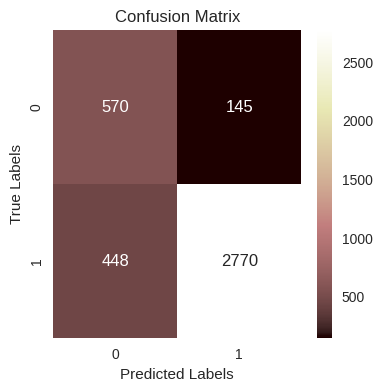

In [ ]:
print("RF MODEL")

eval(rf, X_train_count, X_test_count)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_count_rec = scores
    elif i == "f1-1":
        rf_count_f1 = scores
    elif i == "accuracy":
        rf_count_acc= scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8520570569841908

 precision-0          score for count : 0.5701021218979178

 recall-0             score for count : 0.7608391608391608

 f1-0                 score for count : 0.6516974867363083

 precision-1          score for count : 0.9425718288306616

 recall-1             score for count : 0.8723289238841339

 f1-1                 score for count : 0.9060760660724766



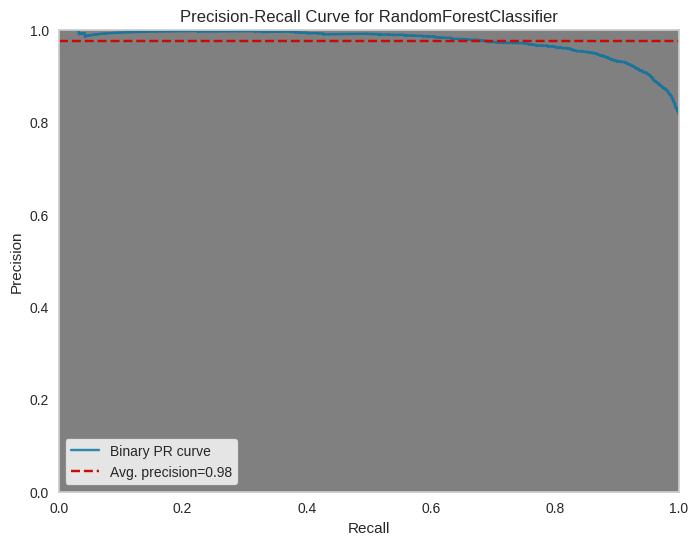

In [ ]:
viz = PrecisionRecallCurve(
                            RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced"),
                            classes=rf.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor('gray')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
rf_AP_count = viz.score_

### TF-IDF

In [ ]:
rf = RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")

rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

RF MODEL
Test Set
              precision    recall  f1-score   support

           0       0.54      0.80      0.64       715
           1       0.95      0.85      0.90      3218

    accuracy                           0.84      3933
   macro avg       0.74      0.82      0.77      3933
weighted avg       0.87      0.84      0.85      3933

Train Set
              precision    recall  f1-score   support

           0       0.60      0.89      0.72      2860
           1       0.97      0.87      0.92     12869

    accuracy                           0.87     15729
   macro avg       0.79      0.88      0.82     15729
weighted avg       0.91      0.87      0.88     15729

Confusion Matrix:
[[ 569  146]
 [ 493 2725]]


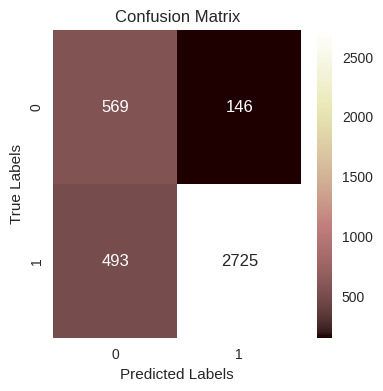

In [ ]:
print("RF MODEL")

eval(rf, X_train_tf_idf, X_test_tf_idf)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_tfidf_rec = scores
    elif i == "f1-1":
        rf_tfidf_f1 = scores
    elif i == "accuracy":
        rf_tfidf_acc = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8396598774808354

 precision-0          score for tfidf : 0.5416923593361707

 recall-0             score for tfidf : 0.779020979020979

 f1-0                 score for tfidf : 0.6387534199845235

 precision-1          score for tfidf : 0.9455979020765712

 recall-1             score for tfidf : 0.8531359171328067

 f1-1                 score for tfidf : 0.8969399334848406



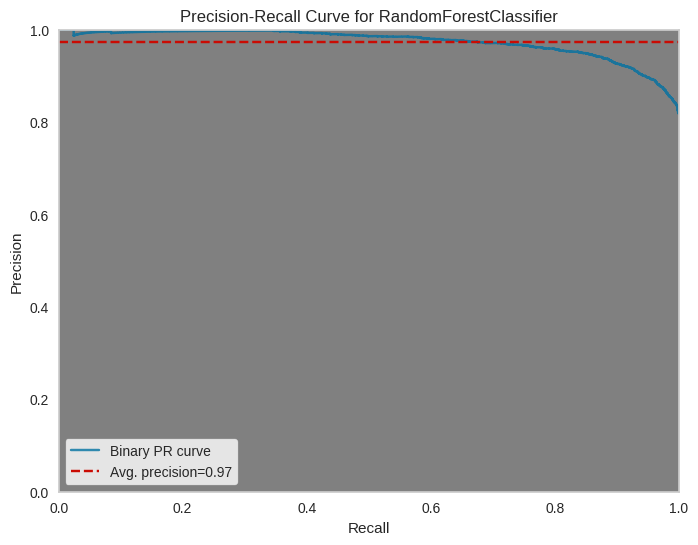

In [ ]:
viz = PrecisionRecallCurve(
                            RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced"),
                            classes=rf.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor('gray')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
rf_AP_tfidf = viz.score_

The RandomForestClassifier model with the "count" vectorizer performed better than the model with the "TF-IDF" vectorizer. It had higher accuracy, precision, recall, and F1-scores for both classes.
This indicates that the "count" vectorizer was more effective in capturing the important information for classification.

## Ada Boosting

### Countvectorizer

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators= 200, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=200, random_state=42)

Ada MODEL
Test Set
              precision    recall  f1-score   support

           0       0.70      0.54      0.61       715
           1       0.90      0.95      0.93      3218

    accuracy                           0.87      3933
   macro avg       0.80      0.74      0.77      3933
weighted avg       0.87      0.87      0.87      3933

Train Set
              precision    recall  f1-score   support

           0       0.74      0.57      0.65      2860
           1       0.91      0.96      0.93     12869

    accuracy                           0.89     15729
   macro avg       0.83      0.76      0.79     15729
weighted avg       0.88      0.89      0.88     15729

Confusion Matrix:
[[ 384  331]
 [ 161 3057]]


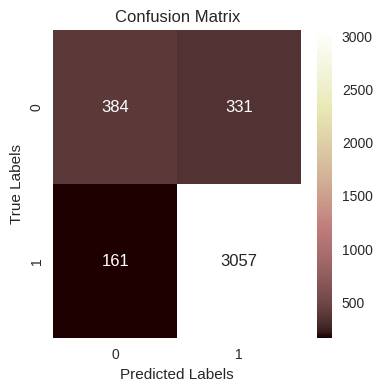

In [ ]:
print("Ada MODEL")

eval(ada, X_train_count, X_test_count)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = AdaBoostClassifier(n_estimators= 200, random_state = 42)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        ada_count_rec = scores
    elif i == "f1-1":
        ada_count_f1 = scores
    elif i == "accuracy":
        ada_count_acc = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8716385280229832

 precision-0          score for count : 0.6927322562335847

 recall-0             score for count : 0.527972027972028

 f1-0                 score for count : 0.598976784527913

 precision-1          score for count : 0.9004034309189848

 recall-1             score for count : 0.9480145394608845

 f1-1                 score for count : 0.9235850031410905



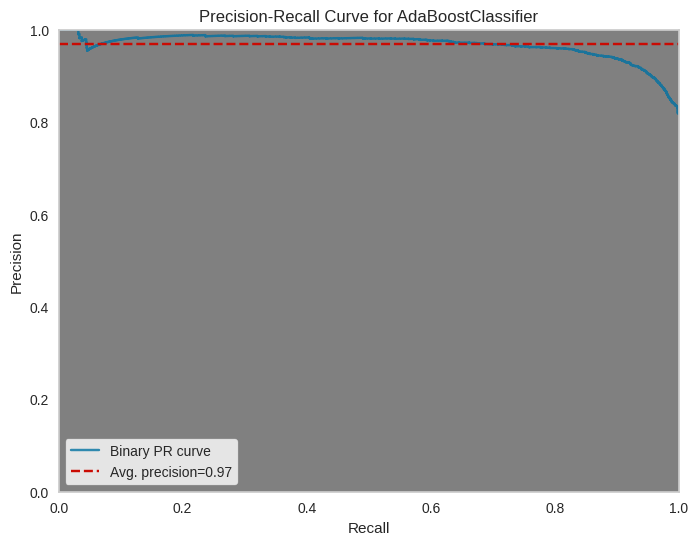

In [ ]:
viz = PrecisionRecallCurve(
                            AdaBoostClassifier(n_estimators= 500, random_state = 42),
                            classes=ada.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor('gray')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
ada_AP_count = viz.score_

### TF-IDF

In [ ]:
ada = AdaBoostClassifier(n_estimators= 200, random_state = 42)

ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=200, random_state=42)

Ada MODEL
Test Set
              precision    recall  f1-score   support

           0       0.68      0.52      0.59       715
           1       0.90      0.95      0.92      3218

    accuracy                           0.87      3933
   macro avg       0.79      0.73      0.76      3933
weighted avg       0.86      0.87      0.86      3933

Train Set
              precision    recall  f1-score   support

           0       0.76      0.61      0.68      2860
           1       0.92      0.96      0.94     12869

    accuracy                           0.89     15729
   macro avg       0.84      0.78      0.81     15729
weighted avg       0.89      0.89      0.89     15729

Confusion Matrix:
[[ 371  344]
 [ 171 3047]]


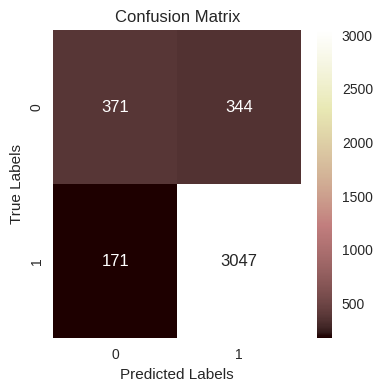

In [ ]:
print("Ada MODEL")

eval(ada, X_train_tf_idf, X_test_tf_idf)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model =AdaBoostClassifier(n_estimators= 200, random_state = 42)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        ada_tfidf_rec = scores
    elif i == "f1-1":
        ada_tfidf_f1 = scores
    elif i == "accuracy":
        ada_tfidf_acc = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8697310207719646

 precision-0          score for tfidf : 0.681309118026893

 recall-0             score for tfidf : 0.5335664335664335

 f1-0                 score for tfidf : 0.5980186703088635

 precision-1          score for tfidf : 0.9011360248252703

 recall-1             score for tfidf : 0.9444396108470758

 f1-1                 score for tfidf : 0.922260725933369



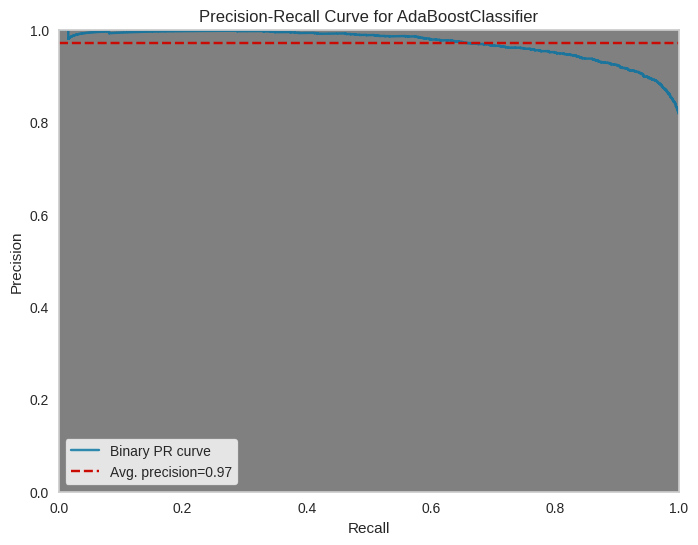

In [ ]:
viz = PrecisionRecallCurve(
                            AdaBoostClassifier(n_estimators= 200, random_state = 42),
                            classes=ada.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor('gray')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
ada_AP_tfidf = viz.score_

The AdaBoostClassifier model performed slightly better when using the "count" vectorizer compared to the "TF-IDF" vectorizer.

## DL modeling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
df0 = pd.read_csv('/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv')
df_dl = df0.copy()
df_dl.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df_dl = df_dl[["Review Text","Recommended IND"]]
df_dl.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [ ]:
df_dl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review Text      22641 non-null  object
 1   Recommended IND  23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


In [ ]:
df_dl.shape

(23486, 2)

In [ ]:
df_dl.isnull().sum()

Review Text        845
Recommended IND      0
dtype: int64

In [ ]:
df_dl.dropna(inplace = True)

In [ ]:
df_dl.shape

(22641, 2)

### Tokenization

In [ ]:
X = df_dl['Review Text'].values
y = df_dl['Recommended IND'].values

In [ ]:
num_words = 10000
# We have defined the most frequent 10000 repeated words in corpus for tokenizing.

tokenizer = Tokenizer(num_words=num_words)

In [ ]:
tokenizer.fit_on_texts(X)

### Creating word index

In [ ]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [ ]:
len(tokenizer.word_index)

14847

### Converting tokens to numeric

In [ ]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [ ]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [ ]:
np.array(X_num_tokens)

array([list([253, 532, 917, 3, 662, 3, 68]),
       list([21, 7, 18, 33, 1713, 99, 2, 1322, 8, 221, 5, 9, 4, 106, 3, 36, 314, 2, 131, 1243, 2, 429, 41, 24, 52, 5, 136, 1243, 33, 95, 2, 72, 4, 95, 3, 38, 501, 2, 21, 1, 86, 11, 31, 416, 39, 4, 53, 454, 1, 392, 41, 155, 29, 4, 130, 1372, 11, 438, 439, 6, 772, 95]),
       list([2, 65, 312, 178, 1095, 12, 7, 18, 3, 51, 195, 5, 8, 102, 12, 31, 2, 1152, 52, 1, 95, 46, 17, 236, 22, 10, 2, 219, 7, 8, 29, 6689, 46, 16, 46, 9, 661, 20, 2, 118, 19, 784, 5, 43, 2, 2147, 5, 9, 95, 97, 82, 15, 39, 637, 250, 1, 25, 656, 15, 68, 3, 26, 258, 10, 1, 175, 656, 65, 4, 23, 148, 272, 475, 3, 527, 718, 489, 4601, 151, 975, 1876, 4, 1877, 142, 1589, 15, 1, 4601, 151, 475, 830, 3247, 313, 1, 469, 5, 688]),
       ...,
       list([7, 26, 59, 10, 1, 25, 15, 23, 121, 203, 7, 429, 41, 24, 561, 12, 31, 36, 314, 2, 15, 427, 8, 179, 5, 11, 9, 1, 106, 3, 124, 241, 5, 136, 14, 244, 45, 5, 41, 24, 166, 34]),
       list([2, 72, 7, 18, 12, 4, 592, 2, 24, 7, 138, 3, 33, 

In [ ]:
X[105]

'The shirt is exactly as it is pictured, i have the burnt orange color and love it! i received numerous compliments both paired with jeans and tucked into a fun skirt. it fits true to size, as i normally wear a small in all retailer however it is the slightest bit tight in the shoulders. i would give this top a 5/5.'

In [ ]:
print(X_num_tokens[105])

[1, 80, 6, 478, 30, 5, 6, 389, 2, 24, 1, 1905, 482, 47, 3, 21, 5, 2, 243, 2182, 210, 189, 563, 14, 92, 3, 871, 313, 4, 283, 109, 5, 78, 130, 8, 22, 30, 2, 239, 32, 4, 46, 9, 75, 103, 143, 5, 6, 1, 2868, 77, 148, 9, 1, 200, 2, 41, 324, 7, 25, 4, 265, 265]


In [ ]:
tokenizer.word_index["shirt"]

80

In [ ]:
tokenizer.word_index["small"]

46

In [ ]:
tokenizer.word_index["color"]

47

### Maximum number of tokens for all documents¶

In [ ]:
num_tokens.mean()

60.39287133960514

In [ ]:
num_tokens.max()

116

In [ ]:
num_tokens.argmax()

16263

In [ ]:
X[16263]

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [ ]:
len(X[16263])

499

In [ ]:
num_tokens.argmin()

820

In [ ]:
X[820]

'Great style!'

In [ ]:
len(X[820])

12

### Fixing token counts of all documents (pad_sequences)

In [ ]:
len(X_num_tokens[105])

63

In [ ]:
np.array(X_num_tokens[105])

array([   1,   80,    6,  478,   30,    5,    6,  389,    2,   24,    1,
       1905,  482,   47,    3,   21,    5,    2,  243, 2182,  210,  189,
        563,   14,   92,    3,  871,  313,    4,  283,  109,    5,   78,
        130,    8,   22,   30,    2,  239,   32,    4,   46,    9,   75,
        103,  143,    5,    6,    1, 2868,   77,  148,    9,    1,  200,
          2,   41,  324,    7,   25,    4,  265,  265])

In [ ]:
num_tokens = [len(tokens) for tokens in X_num_tokens]

num_tokens = np.array(num_tokens)

In [ ]:
num_tokens

array([ 7, 62, 97, ..., 42, 85, 18])

In [ ]:
max_tokens = 103

In [ ]:
sum(num_tokens < max_tokens) / len(num_tokens)

0.9604699439070712

In [ ]:
sum(num_tokens < max_tokens)

21746

In [ ]:
len(num_tokens)

22641

In [ ]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [ ]:
X_pad.shape

(22641, 103)

In [ ]:
X_pad[105]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    1,   80,    6,  478,
         30,    5,    6,  389,    2,   24,    1, 1905,  482,   47,    3,
         21,    5,    2,  243, 2182,  210,  189,  563,   14,   92,    3,
        871,  313,    4,  283,  109,    5,   78,  130,    8,   22,   30,
          2,  239,   32,    4,   46,    9,   75,  103,  143,    5,    6,
          1, 2868,   77,  148,    9,    1,  200,    2,   41,  324,    7,
         25,    4,  265,  265], dtype=int32)

### Train Set Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=101)


### Modeling

In [ ]:
model = Sequential()

In [ ]:
embedding_size = 100

In [ ]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='embedding_layer'))

In [ ]:
model.add(GRU(units=48, return_sequences=True))
model.add(GRU(units=24, return_sequences=True))
model.add(GRU(units=12))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = Adam(learning_rate=0.006)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['Recall'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding  (None, 103, 100)          1000000   
 )                                                               
                                                                 
 gru (GRU)                   (None, 103, 48)           21600     
                                                                 
 gru_1 (GRU)                 (None, 103, 24)           5328      
                                                                 
 gru_2 (GRU)                 (None, 12)                1368      
                                                                 
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 1028309 (3.92 MB)
Trainable params: 1028309 (3.92 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="auto",
                           verbose=1, patience = 10, restore_best_weights=True)

In [ ]:
pd.Series(y_train).value_counts(normalize=True)

1    0.818849
0    0.181151
dtype: float64

In [ ]:
weights = {0:82, 1:18}

In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=128, class_weight=weights,
          validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/20
142/142 [==============================] - 35s 165ms/step - loss: 14.1330 - recall: 0.7453 - val_loss: 0.3579 - val_recall: 0.8636
Epoch 2/20
142/142 [==============================] - 11s 77ms/step - loss: 8.3116 - recall: 0.8678 - val_loss: 0.3456 - val_recall: 0.8390
Epoch 3/20
142/142 [==============================] - 9s 60ms/step - loss: 5.6719 - recall: 0.9072 - val_loss: 0.3560 - val_recall: 0.8493
Epoch 4/20
142/142 [==============================] - 5s 33ms/step - loss: 4.0802 - recall: 0.9371 - val_loss: 0.3247 - val_recall: 0.9008
Epoch 5/20
142/142 [==============================] - 5s 36ms/step - loss: 3.0911 - recall: 0.9539 - val_loss: 0.3518 - val_recall: 0.9040
Epoch 6/20
142/142 [==============================] - 5s 38ms/step - loss: 2.2534 - recall: 0.9691 - val_loss: 0.3720 - val_recall: 0.9118
Epoch 7/20
142/142 [==============================] - 3s 23ms/step - loss: 1.7668 - recall: 0.9746 - val_loss: 0.3964 - val_recall: 0.8981
Epoch 8/20
142/142 [===

### Model Evaluation

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,14.133047,0.745331,0.357895,0.863575
1,8.311583,0.867844,0.345648,0.839040
2,5.671916,0.907221,0.355986,0.849286
3,4.080158,0.937091,0.324654,0.900782
4,3.091100,0.953948,0.351795,0.904017


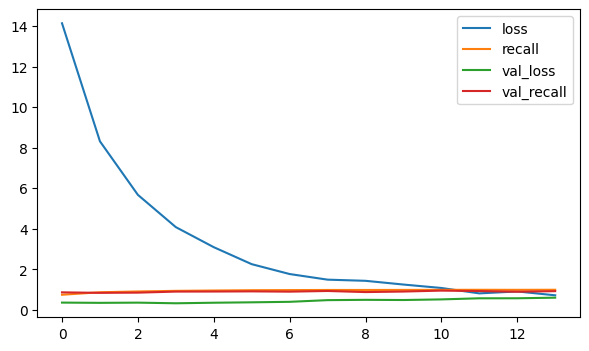

In [ ]:
model_loss.plot();

In [ ]:
model.evaluate(X_train, y_train)

566/566 [==============================] - 4s 8ms/step - loss: 0.1070 - recall: 0.9550


[0.10699133574962616, 0.9549592137336731]

In [ ]:
model.evaluate(X_test, y_test)

142/142 [==============================] - 1s 8ms/step - loss: 0.3247 - recall: 0.9008


[0.3246544599533081, 0.9007818698883057]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model.predict(X_train) >= 0.5).astype("int32")

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

566/566 [==============================] - 4s 5ms/step
[[ 3256    25]
 [  668 14163]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      3281
           1       1.00      0.95      0.98     14831

    accuracy                           0.96     18112
   macro avg       0.91      0.97      0.94     18112
weighted avg       0.97      0.96      0.96     18112



In [ ]:
y_pred = (model.predict(X_test) >= 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

142/142 [==============================] - 2s 5ms/step
[[ 649  171]
 [ 368 3341]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.79      0.71       820
           1       0.95      0.90      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.79      0.85      0.82      4529
weighted avg       0.89      0.88      0.89      4529



142/142 [==============================] - 1s 5ms/step


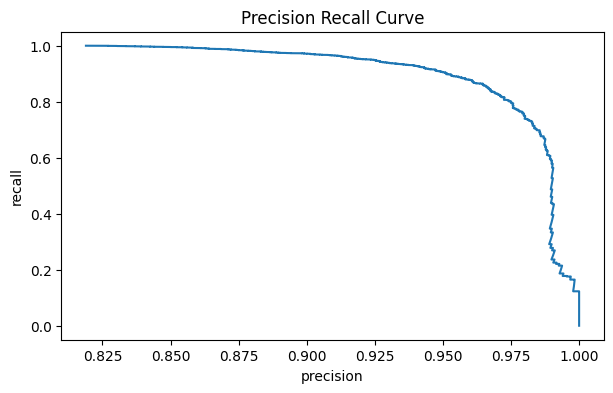

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score, recall_score,accuracy_score

DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)
DL_acc = accuracy_score(y_test,y_pred)

In [ ]:
average_precision_score(y_test, y_pred_proba)

0.980437624082994

In [ ]:
DL_AP

0.980437624082994

## BERT Modeling

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 110.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.5 MB/s eta 0:00:00


### Read Data

In [ ]:
X

array(['Absolutely wonderful - silky and sexy and comfortable',
       'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
       'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
       ...,
       "This fit well, but the top was very see through. this never would have worked for me. i

In [ ]:
y

array([1, 1, 0, ..., 0, 1, 1])

### Tokenization

In [ ]:
from transformers import AutoTokenizer #BertTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# For every sentence...
num_of_sent_tokens = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(sent,
                                 add_special_tokens=True)
    num_of_sent_tokens.append(len(input_ids))

print('Max sentence length: ', max(num_of_sent_tokens))

(…)cased/resolve/main/tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

(…)rt-base-uncased/resolve/main/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

(…)bert-base-uncased/resolve/main/vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

(…)base-uncased/resolve/main/tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Max sentence length:  162


In [ ]:
np.array(num_of_sent_tokens).mean()

76.75659202332052

In [ ]:
sum(np.array(num_of_sent_tokens) <= 162) / len(num_of_sent_tokens)

1.0

### Train test split

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,
                                                        y,
                                                        test_size=0.1,
                                                        stratify=y,
                                                        random_state=101)

### Fixing token counts of all documents

In [ ]:
all_sentence_tokens = tokenizer(list(X),
                                max_length=162,
                                truncation=True,
                                padding='max_length',
                                add_special_tokens=True)

In [ ]:
np.array(all_sentence_tokens['input_ids'])

array([[ 101, 7078, 6919, ...,    0,    0,    0],
       [ 101, 2293, 2023, ...,    0,    0,    0],
       [ 101, 1045, 2018, ...,    0,    0,    0],
       ...,
       [ 101, 2023, 4906, ...,    0,    0,    0],
       [ 101, 1045, 4149, ...,    0,    0,    0],
       [ 101, 2023, 4377, ...,    0,    0,    0]])

In [ ]:
np.array(all_sentence_tokens['attention_mask'])

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

### Transformation Vectors to Matrices

In [ ]:
def transformation(X):
  # set array dimensions
  seq_len = 162

  all_sentence_tokens = tokenizer(list(X),
                                  max_length=seq_len,
                                  truncation=True,
                                  padding='max_length',
                                  add_special_tokens=True)

  return np.array(all_sentence_tokens['input_ids']), np.array(all_sentence_tokens['attention_mask'])

In [ ]:
Xids_train, Xmask_train = transformation(X_train2)

Xids_test, Xmask_test = transformation(X_test2)

In [ ]:
labels_test = y_test2.reshape(-1,1)
labels_test

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
labels_train = y_train2.reshape(-1,1)
labels_train

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [ ]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (20376, 162)
Xmask_train.shape : (20376, 162)
Xids_test.shape   : (2265, 162)
Xmask_test.shape  : (2265, 162)


In [ ]:
Xids_train

array([[ 101, 1045, 2387, ...,    0,    0,    0],
       [ 101, 1045, 3866, ...,    0,    0,    0],
       [ 101, 1045, 3641, ...,    0,    0,    0],
       ...,
       [ 101, 1045, 3641, ...,    0,    0,    0],
       [ 101, 2023, 2327, ...,    0,    0,    0],
       [ 101, 2228, 3976, ...,    0,    0,    0]])

### Transformation Matrix to Tensorflow tensor

In [ ]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train,
                                                    Xmask_train,
                                                    labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test,
                                                   Xmask_test,
                                                   labels_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [ ]:
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [ ]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [ ]:
batch_size = 32

# batch_size
# fit into a batch of 32
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

### Creating optimization

In [ ]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 74.7 MB/s eta 0:00:00


In [ ]:
from official.nlp import optimization
epochs = 2
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
print(len(train_ds)*2)
print(int(0.1*len(train_ds)*2))

1274
127


### Creating Model with TPU

TPUs are hardware accelerators specialized in deep learning tasks

In [ ]:
from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
from tensorflow.keras import Model
from transformers import TFAutoModel
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Recall
from tensorflow.keras.optimizers import Adam

In [ ]:
from transformers import TFAutoModel, AutoTokenizer

# Load the BERT model
model = TFAutoModel.from_pretrained("bert-base-uncased")

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"]

x = Dense(80, activation='relu')(embeddings)
x = BatchNormalization()(x)
x = Dropout(0.1, name="dropout")(x)
y = Dense(1, activation='sigmoid', name='outputs')(x)

model = Model(inputs=[input_ids, attention_mask], outputs=y)

In [ ]:
learning_rate = 0.001

model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='binary_crossentropy',
              metrics=['Recall'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 162)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 162)]                0         []                            
 )                                                                                                
                                                                                                  
 bert (TFBertMainLayer)      TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
                             ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 162, 7                                       

### Model Fiting

In [ ]:
model.fit(train_ds, validation_data= val_ds, epochs=10)

Epoch 1/10
637/637 [==============================] - 761s 1s/step - loss: 0.5095 - recall: 0.9663 - val_loss: 0.4731 - val_recall: 1.0000
Epoch 2/10
637/637 [==============================] - 698s 1s/step - loss: 0.4841 - recall: 0.9985 - val_loss: 0.7303 - val_recall: 0.0000e+00
Epoch 3/10
637/637 [==============================] - 695s 1s/step - loss: 0.4747 - recall: 1.0000 - val_loss: 2.0312 - val_recall: 1.0000
Epoch 4/10
637/637 [==============================] - 701s 1s/step - loss: 0.4735 - recall: 1.0000 - val_loss: 0.5464 - val_recall: 1.0000
Epoch 5/10
637/637 [==============================] - 685s 1s/step - loss: 0.4748 - recall: 1.0000 - val_loss: 4.4520 - val_recall: 0.0000e+00
Epoch 6/10
637/637 [==============================] - 695s 1s/step - loss: 0.4737 - recall: 1.0000 - val_loss: 1.6513 - val_recall: 1.0000
Epoch 7/10
637/637 [==============================] - 698s 1s/step - loss: 0.4739 - recall: 1.0000 - val_loss: 0.4913 - val_recall: 1.0000
Epoch 8/10
637/637 

### Model evaluation

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head(10)

,loss,recall,val_loss,val_recall
0,0.509529,0.966317,0.473110,1.0
1,0.484055,0.998502,0.730287,0.0
2,0.474697,1.000000,2.031213,1.0
3,0.473549,1.000000,0.546400,1.0
4,0.474765,1.000000,4.451958,0.0
5,0.473675,1.000000,1.651330,1.0
6,0.473892,1.000000,0.491328,1.0
7,0.473946,1.000000,0.484677,1.0
8,0.473908,1.000000,0.618831,1.0
9,0.474055,1.000000,0.477216,1.0


<Axes: >

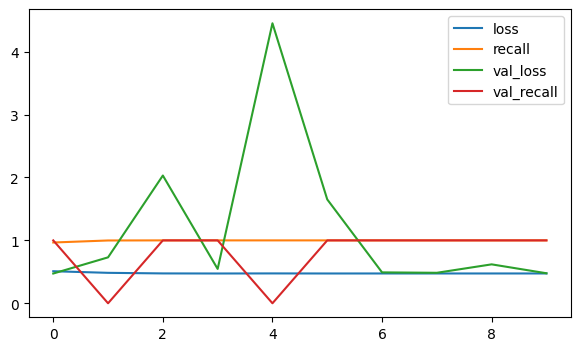

In [ ]:
model_loss.plot()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(val_ds) >= 0.5

print(classification_report(y_test2, y_pred))

71/71 [==============================] - 33s 333ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       410
           1       0.82      1.00      0.90      1855

    accuracy                           0.82      2265
   macro avg       0.41      0.50      0.45      2265
weighted avg       0.67      0.82      0.74      2265



In [ ]:
y_train_pred = model.predict(train_ds) >= 0.5

print(classification_report(y_train2, y_train_pred))

637/637 [==============================] - 217s 341ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3691
           1       0.82      1.00      0.90     16685

    accuracy                           0.82     20376
   macro avg       0.41      0.50      0.45     20376
weighted avg       0.67      0.82      0.74     20376



In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
y_pred_proba = model.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [ ]:
average_precision_score(y_test2, y_pred_proba)

0.8161932018209895

In [ ]:
BERT_without_weighted_AP = average_precision_score(y_test2, y_pred_proba)
BERT_without_weighted_f1 = f1_score(y_test2, y_pred)
BERT_without_weighted_rec = recall_score(y_test2, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

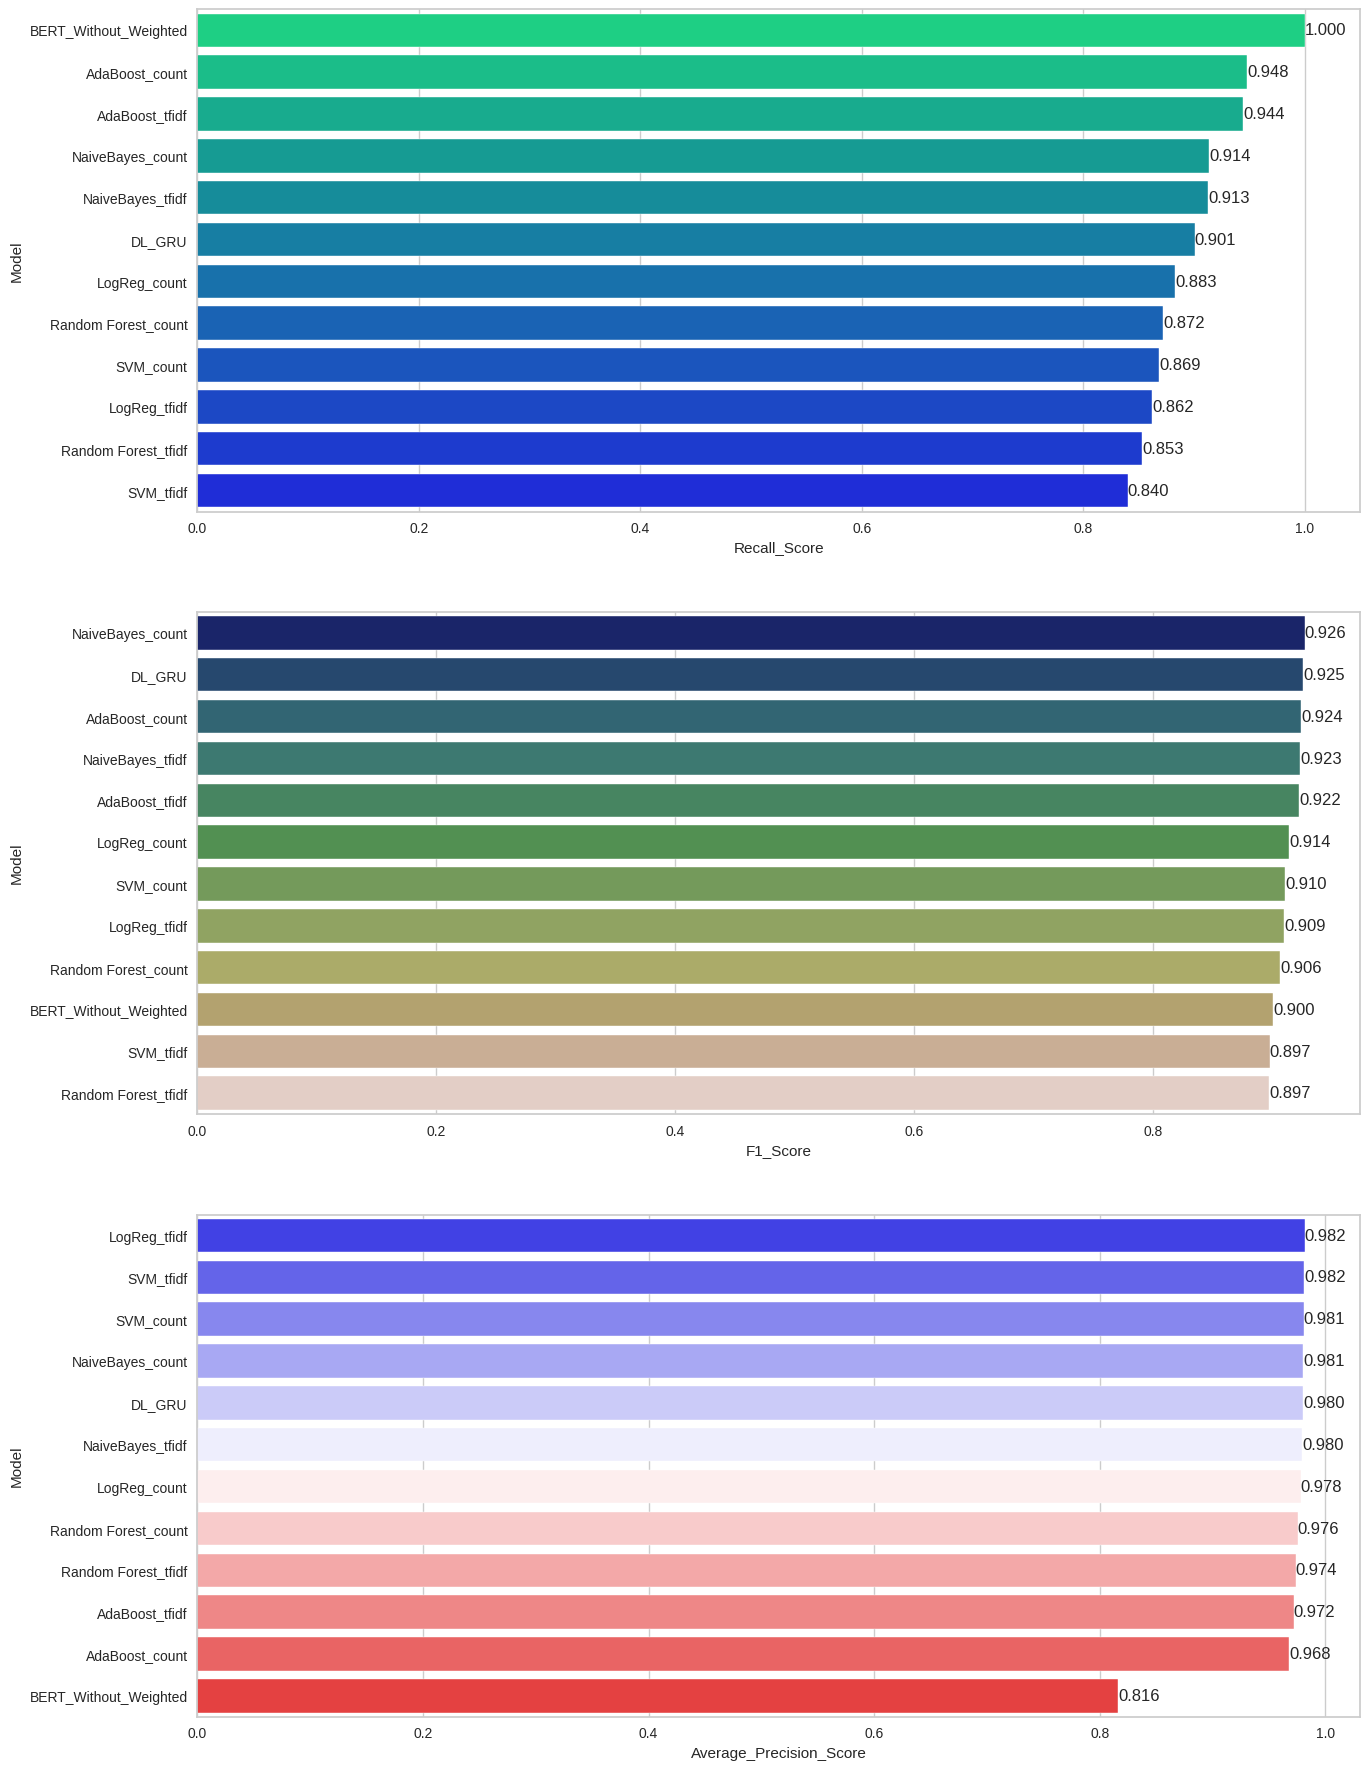

In [ ]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL_GRU", "BERT_Without_Weighted"],

                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1,
                                             rf_count_f1, ada_count_f1, nb_tfidf_f1, log_tfidf_f1,
                                             svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1, BERT_without_weighted_f1],

                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec,
                                                   rf_count_rec, ada_count_rec,
                                                  nb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec,
                                                  rf_tfidf_rec, ada_tfidf_rec, DL_rec, BERT_without_weighted_rec],

                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count,
                                                   ada_AP_count, nb_AP_tfidf, log_AP_tfidf, svc_AP_tfidf,
                                                   rf_AP_tfidf, ada_AP_tfidf, DL_AP, BERT_without_weighted_AP]})
def labels(ax):

    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment

plt.figure(figsize=(15,30))
plt.subplot(411)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="winter_r")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="gist_earth")
labels(ax)


plt.subplot(413)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="bwr")
labels(ax)


plt.show();


### Conclusion

`In this project, we explored several machine learning algorithms and a deep learning algorithm. The machine learning algorithms used included Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest, and Ada Boosting. These algorithms were employed to make predictions and determine product recommendations based on sentiment analysis. Additionally, we utilized a deep learning algorithm, which is a type of neural network model, to compare its performance with the traditional machine learning methods.`


`The dataset comes from Woman Clothing Review `

`When comparing the models, it is challenging to determine the best choice as their scores are closely aligned, indicating similar performance.`

`This poses a challenge when selecting the most suitable model for sentiment analysis in classifying product recommendations.`

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___